# Code to implement a Q function for reinforcement learning.
- Later we use a neural network for deep Q learning
- A Q function is a function (action,state) providing a value for each state and action

In [ ]:
#Reinforcement learning examples
# r is the reinforcement for every place in the small 1D environment
# We expand to a 2-d environemnt from openAI Gym farther down

r = [1,1,1,1]
#r is hidden from the agent

In [ ]:
# initially the Q function is empty

R = sum(r)
n = len(r)
Qnew = (1/n)*R
print(Qnew)

# The following cells show different ways to calculate Qnew, the updated Q function

In [ ]:
Rn = r[-1]  ##Rn is the most recent sample (last element of r vector)
Rprev = r[:-1]  ##R(n-1) complete history; this grows too large
Qnew = 1/n*(Rn + sum(Rprev))
print(Qnew)

In [ ]:
##the following is just an algebraic trick to make a substitution
Qnew = 1/n*(Rn + ((n-1)/(n-1)*sum(Rprev)))  ##note the n-1 terms cancel   
print('Qnew after breaking out n-1/n-1: ', Qnew)
#Qnew is Qn+1; define Qn for substitution into the above
Qn = (1/(n-1))*sum(Rprev)  
print('Qn value: ', Qn)

#after substitution, the equation becomes:
Qnew = (1/n)*(Rn + (n-1)*Qn)
print("Qnew after substitution: ", Qnew)

Qnew = (1/n)*(Rn + n*Qn - Qn)  ##(n-1)*Qn becomes nQn - Qn 
print('Qnew after breaking out n*Qn - Qn', Qnew)

Qnew = Qn + 1/n*(Rn-Qn)  ##n*Qn can come out of the 1/n

print('Qnew after rearranging: ', Qnew)

# Another example with a multiarm bandid

In [ ]:
from random import gauss, choice, randint

from numpy.random import uniform
for i in range(10):
   print(uniform(0,1))

In [ ]:
import numpy as np
##only need to save Qn and n


##target is the nth reward, Qn is old estimate
#Qnew = Qn + stepsize*[target-Qn]

#compare this to the equation above Qnew = Qn + 1/n*(Rn-Qn) 
#1/n is the long term average

##apply to the bandit algorithm

payout_1 = [0,3]
payout_2 = [2,5]
payout_3 = [2,5]


def run_bandit(A):
    '''take a pull of the handle'''
    print("A", A)
    
    if A==0:
        return randint(0,3)
    elif A==1:
        return randint(2,5)
    elif A==2:
        return randint(3,7)       
    
    
k = 3  ##number of bandits

##start with uniform Q and N=0 for each bandito
Q, N = [], []

for i in range(k):
    Q.append(5)
    N.append(0)

##keep a hisory of rewards and actions    
rewards, actions = [], []
explore_prob = .5
#A is the action (which bandito is pulled)
npulls = 100

for i in range(npulls):
    if uniform(0,1) > explore_prob:
        print("Exploit")
        #act greedily; take argmax
        A = np.argmax(Q)
    else:
        print("Explore")
        #try a random bandit
        A = randint(0,len(Q)-1) 
 
    #take a pull and get a reward (or no reward)
    R = run_bandit(A)
    #print("R", R)
    rewards.append(R)
    actions.append(A)

    N[A] += 1
   
    ##update the Q matrix based on reward and long run Q[A]
    #over time, each reward affects Q less because 1/N[A] gets large
    #this approach does not do well when the bandits are subject to change
    Q[A] = Q[A] + (1/N[A]) * (R-Q[A])
    print("Q matrix: ", Q)
    

print("actions, rewards: ", actions, rewards)

a0,a1,a2 = [],[],[]

for action,reward in zip(actions,rewards):
    if action==0:
      a0.append(reward)
    elif action==1:
      a1.append(reward)
    elif action==2:
      a2.append(reward)


print(a0)
print(a1)
print(a2)

##using the weighted sum (allows for temporal discounting)

#Qnew = np.power((1-alpha),n

In [1]:
#remeber to activate deep-learning conda environment
import gym

import numpy as np
import time, pickle, os
from matplotlib import pyplot as plt
#env = gym.make('FrozenLake-v0')
env = gym.make('FrozenLake-v0', is_slippery=False)

done thru:  0
hole:  12 0.0
hole:  12 0.0
hole:  5 0.0
hole:  5 0.0
hole:  12 0.0
hole:  5 0.0
hole:  5 0.0
goal:  15 1.0
show q
left
down
right
up


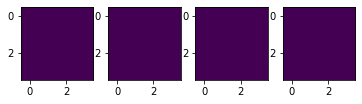

target:  1.0 predict:  0.0 error:  1.0
state:  14  state2:  15
reward:  1.0 action right
Q[state,action] after:  0.81
*****************
hole:  12 0.0
hole:  5 0.0
done thru:  10
hole:  12 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
done thru:  20
hole:  5 0.0
hole:  12 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  12 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
done thru:  30
hole:  5 0.0
hole:  5 0.0
hole:  12 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  7 0.0
hole:  5 0.0
done thru:  40
hole:  12 0.0
hole:  12 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  11 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
done thru:  50
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  12 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
target:  0.7776000000000001 predict:  0.0 error:  0.7776000000000001
state:  10  state2:  14
reward:  0.0 action down
Q[state,acti

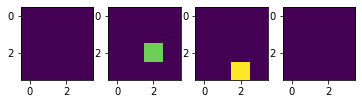

target:  1.0 predict:  0.81 error:  0.18999999999999995
state:  14  state2:  15
reward:  1.0 action right
Q[state,action] after:  0.9639
*****************
hole:  12 0.0
done thru:  60
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  7 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
done thru:  70
hole:  5 0.0
hole:  12 0.0
hole:  5 0.0
hole:  12 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
target:  0.60466176 predict:  0.0 error:  0.60466176
state:  9  state2:  10
reward:  0.0 action right
Q[state,action] after:  0.48977602560000005
*****************
hole:  11 0.0
hole:  5 0.0
hole:  12 0.0
done thru:  80
hole:  5 0.0
hole:  5 0.0
target:  0.47018498457600005 predict:  0.0 error:  0.47018498457600005
state:  8  state2:  9
reward:  0.0 action right
Q[state,action] after:  0.3808498375065601
*****************
hole:  5 0.0
hole:  5 0.0
target:  0.36561584400629765 predict:  0.0 error:  0.36561584400629765
state:  4  state2:  8
reward:  0.0 action down
Q[state,

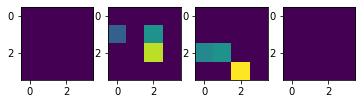

target:  1.0 predict:  0.9639 error:  0.03610000000000002
state:  14  state2:  15
reward:  1.0 action right
Q[state,action] after:  0.993141
*****************
target:  0.28430288029929707 predict:  0.0 error:  0.28430288029929707
state:  0  state2:  4
reward:  0.0 action down
Q[state,action] after:  0.23028533304243065
*****************
target:  0.43508285436749417 predict:  0.29614883364510114 error:  0.13893402072239303
state:  4  state2:  8
reward:  0.0 action down
Q[state,action] after:  0.4086853904302395
*****************
target:  0.47018498457600005 predict:  0.45321130663280645 error:  0.0169736779431936
state:  8  state2:  9
reward:  0.0 action right
Q[state,action] after:  0.46695998576679326
*****************
target:  0.44828158633612153 predict:  0.0 error:  0.44828158633612153
state:  9  state2:  8
reward:  0.0 action left
Q[state,action] after:  0.3631080849322585
*****************
target:  0.47018498457600005 predict:  0.46695998576679326 error:  0.0032249988092067916
st

target:  0.4329918309797914 predict:  0.4329336761206541 error:  5.815485913729379e-05
state:  0  state2:  4
reward:  0.0 action down
Q[state,action] after:  0.4329807815565553
*****************
target:  0.4156615502942931 predict:  0.4140381975522817 error:  0.0016233527420113636
state:  4  state2:  0
reward:  0.0 action up
Q[state,action] after:  0.4153531132733109
*****************
target:  0.4329918309797914 predict:  0.4329807815565553 error:  1.1049423236098033e-05
state:  0  state2:  4
reward:  0.0 action down
Q[state,action] after:  0.43298973158937654
*****************
target:  0.4329918309797914 predict:  0.34965198986215 error:  0.08333984111764137
state:  4  state2:  4
reward:  0.0 action left
Q[state,action] after:  0.4171572611674395
*****************
target:  0.41567014232580146 predict:  0.4153531132733109 error:  0.00031702905249053615
state:  4  state2:  0
reward:  0.0 action up
Q[state,action] after:  0.41560990680582827
*****************
target:  0.41567014232580146

target:  0.91236022244352 predict:  0.72893365890048 error:  0.18342656354304
state:  14  state2:  10
reward:  0.0 action up
Q[state,action] after:  0.8775091753703423
*****************
hole:  11 0.0
target:  0.43331506668665576 predict:  0.4332992503635345 error:  1.5816323121253806e-05
state:  0  state2:  4
reward:  0.0 action down
Q[state,action] after:  0.4333120615852627
*****************
hole:  5 0.0
target:  0.4159795791218522 predict:  0.41371071690836314 error:  0.0022688622134890424
state:  0  state2:  0
reward:  0.0 action up
Q[state,action] after:  0.4155484953012893
*****************
target:  0.43331506668665576 predict:  0.4333120615852627 error:  3.0051013930609827e-06
state:  0  state2:  4
reward:  0.0 action down
Q[state,action] after:  0.43331449571739106
*****************
target:  0.45137681859299267 predict:  0.4513698611319331 error:  6.957461059553527e-06
state:  4  state2:  8
reward:  0.0 action down
Q[state,action] after:  0.45137549667539134
*****************
h

target:  0.6993747845081727 predict:  0.6917998824954958 error:  0.007574902012676854
state:  4  state2:  8
reward:  0.0 action down
Q[state,action] after:  0.697935553125764
*****************
target:  0.6700181310007335 predict:  0.6285724310798797 error:  0.041445699920853785
state:  8  state2:  4
reward:  0.0 action up
Q[state,action] after:  0.6621434480157713
*****************
target:  0.6993747845081727 predict:  0.697935553125764 error:  0.0014392313824086456
state:  4  state2:  8
reward:  0.0 action down
Q[state,action] after:  0.699101330545515
*****************
target:  0.7381904257843199 predict:  0.7285154005293466 error:  0.009675025254973324
state:  8  state2:  9
reward:  0.0 action right
Q[state,action] after:  0.736352170985875
*****************
target:  0.44828158633612153 predict:  0.44075830911400393 error:  0.007523277222117597
state:  9  state2:  13
reward:  0.0 action down
Q[state,action] after:  0.44685216366391917
*****************
hole:  12 0.0
target:  0.67113

target:  0.7083275110777107 predict:  0.7080024420278206 error:  0.0003250690498901587
state:  4  state2:  8
reward:  0.0 action down
Q[state,action] after:  0.7082657479582316
*****************
target:  0.7083275110777107 predict:  0.6970855276762019 error:  0.011241983401508837
state:  8  state2:  8
reward:  0.0 action left
Q[state,action] after:  0.7061915342314241
*****************
target:  0.6799351180399024 predict:  0.6743392817912532 error:  0.005595836248649122
state:  8  state2:  4
reward:  0.0 action up
Q[state,action] after:  0.678871909152659
*****************
target:  0.6799351180399024 predict:  0.6782084068673114 error:  0.0017267111725909334
state:  4  state2:  4
reward:  0.0 action left
Q[state,action] after:  0.67960704291711
*****************
target:  0.7083275110777107 predict:  0.7082657479582316 error:  6.176311947914126e-05
state:  4  state2:  8
reward:  0.0 action down
Q[state,action] after:  0.7083157760850097
*****************
target:  0.7083275110777107 pred

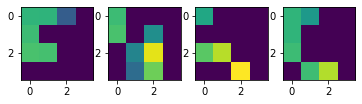

target:  1.0 predict:  0.993141 error:  0.0068589999999999485
state:  14  state2:  15
reward:  1.0 action right
Q[state,action] after:  0.99869679
*****************
target:  0.621863107703443 predict:  0.5929037725714069 error:  0.02895933513203608
state:  0  state2:  1
reward:  0.0 action right
Q[state,action] after:  0.6163608340283562
*****************
target:  0.6524483757735131 predict:  0.6477740705244198 error:  0.004674305249093291
state:  1  state2:  0
reward:  0.0 action left
Q[state,action] after:  0.6515602577761854
*****************
target:  0.6802453191572102 predict:  0.6796337247640761 error:  0.0006115943931340739
state:  0  state2:  4
reward:  0.0 action down
Q[state,action] after:  0.6801291162225147
*****************
target:  0.6802453191572102 predict:  0.67960704291711 error:  0.0006382762401001552
state:  4  state2:  4
reward:  0.0 action left
Q[state,action] after:  0.6801240466715912
*****************
target:  0.6802453191572102 predict:  0.6801240466715912 err

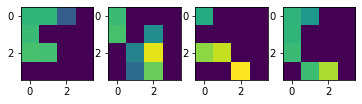

target:  1.0 predict:  0.99869679 error:  0.001303209999999999
state:  14  state2:  15
reward:  1.0 action right
Q[state,action] after:  0.9997523901
*****************
target:  0.6803025335327814 predict:  0.6802411242312677 error:  6.140930151365964e-05
state:  0  state2:  4
reward:  0.0 action down
Q[state,action] after:  0.6802908657654938
*****************
target:  0.7953761779800743 predict:  0.7086484724299806 error:  0.08672770555009368
state:  4  state2:  8
reward:  0.0 action down
Q[state,action] after:  0.7788979139255565
*****************
target:  0.8727339813688384 predict:  0.8285168520625774 error:  0.04421712930626098
state:  8  state2:  9
reward:  0.0 action right
Q[state,action] after:  0.8643327268006488
*****************
target:  0.6591903764937502 predict:  0.4480099960284031 error:  0.21118038046534715
state:  9  state2:  13
reward:  0.0 action down
Q[state,action] after:  0.6190661042053343
*****************
target:  0.959762294496 predict:  0.0 error:  0.95976229

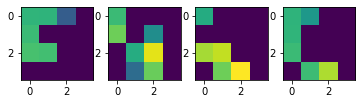

target:  1.0 predict:  0.9997523901 error:  0.0002476098999999454
state:  14  state2:  15
reward:  1.0 action right
Q[state,action] after:  0.999952954119
*****************
target:  0.625497847465138 predict:  0.6163608340283562 error:  0.00913701343678186
state:  0  state2:  1
reward:  0.0 action right
Q[state,action] after:  0.6237618149121494
*****************
target:  0.625497847465138 predict:  0.5326204655943236 error:  0.0928773818708144
state:  1  state2:  1
reward:  0.0 action up
Q[state,action] after:  0.6078511449096833
*****************
target:  0.653079231134874 predict:  0.6515602577761854 error:  0.0015189733586885579
state:  1  state2:  0
reward:  0.0 action left
Q[state,action] after:  0.6527906261967231
*****************
target:  0.6266790011488542 predict:  0.6237618149121494 error:  0.002917186236704783
state:  0  state2:  1
reward:  0.0 action right
Q[state,action] after:  0.6261247357638803
*****************
target:  0.28236639944203024 predict:  0.0 error:  0.282

target:  0.8039786430711223 predict:  0.7669528938042509 error:  0.03702574926687141
state:  4  state2:  4
reward:  0.0 action left
Q[state,action] after:  0.7969437507104168
*****************
hole:  5 0.0
target:  0.8039786430711223 predict:  0.8018251963666856 error:  0.0021534467044367345
state:  0  state2:  4
reward:  0.0 action down
Q[state,action] after:  0.8035694881972794
*****************
target:  0.8039786430711223 predict:  0.7969437507104168 error:  0.007034892360705536
state:  4  state2:  4
reward:  0.0 action left
Q[state,action] after:  0.8026420135225882
*****************
hole:  5 0.0
target:  0.7108177575775732 predict:  0.6268915171093682 error:  0.08392624046820496
state:  0  state2:  1
reward:  0.0 action right
Q[state,action] after:  0.6948717718886142
*****************
target:  0.7714267086693881 predict:  0.7404351641433053 error:  0.03099154452608277
state:  1  state2:  0
reward:  0.0 action left
Q[state,action] after:  0.7655383152094324
*****************
targe

goal:  15 1.0
show q
left
down
right
up


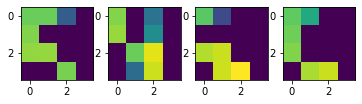

target:  1.0 predict:  0.999952954119 error:  4.70458810000185e-05
state:  14  state2:  15
reward:  1.0 action right
Q[state,action] after:  0.99999106128261
*****************
target:  0.8125690372911645 predict:  0.8125587085452038 error:  1.0328745960630492e-05
state:  0  state2:  4
reward:  0.0 action down
Q[state,action] after:  0.8125670748294319
*****************
target:  0.7800643918362546 predict:  0.7791493405905533 error:  0.0009150512457013482
state:  4  state2:  0
reward:  0.0 action up
Q[state,action] after:  0.7798905320995714
*****************
target:  0.7460650434709879 predict:  0.7453879225251067 error:  0.0006771209458812377
state:  0  state2:  1
reward:  0.0 action right
Q[state,action] after:  0.7459363904912705
*****************
hole:  5 0.0
done thru:  130
target:  0.7460650434709879 predict:  0.7459363904912705 error:  0.00012865297971742518
state:  0  state2:  1
reward:  0.0 action right
Q[state,action] after:  0.7460405994048416
*****************
target:  0.78

target:  0.8149020632679291 predict:  0.8148107072362207 error:  9.135603170840056e-05
state:  0  state2:  4
reward:  0.0 action down
Q[state,action] after:  0.8148847056219045
*****************
target:  0.8149020632679291 predict:  0.8143428492383626 error:  0.0005592140295664905
state:  4  state2:  4
reward:  0.0 action left
Q[state,action] after:  0.8147958126023115
*****************
hole:  5 0.0
target:  0.7498888024896257 predict:  0.7478953616615209 error:  0.00199344082810482
state:  0  state2:  1
reward:  0.0 action right
Q[state,action] after:  0.7495100487322859
*****************
target:  0.7498888024896257 predict:  0.6078511449096833 error:  0.14203765757994247
state:  1  state2:  1
reward:  0.0 action up
Q[state,action] after:  0.7229016475494366
*****************
target:  0.7498888024896257 predict:  0.7229016475494366 error:  0.026987154940189106
state:  1  state2:  1
reward:  0.0 action up
Q[state,action] after:  0.7447612430509898
*****************
hole:  5 0.0
target:

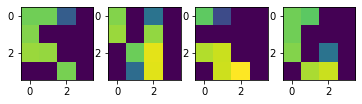

target:  1.0 predict:  0.99999106128261 error:  8.938717390050144e-06
state:  14  state2:  15
reward:  1.0 action right
Q[state,action] after:  0.9999983016436959
*****************
target:  0.8150901197845073 predict:  0.8150018621776295 error:  8.825760687780626e-05
state:  0  state2:  4
reward:  0.0 action down
Q[state,action] after:  0.8150733508392005
*****************
hole:  5 0.0
target:  0.7824704168056325 predict:  0.7817551656093816 error:  0.0007152511962508212
state:  0  state2:  0
reward:  0.0 action up
Q[state,action] after:  0.7823345190783448
*****************
target:  0.7510782838091367 predict:  0.751045904435174 error:  3.2379373962609925e-05
state:  0  state2:  1
reward:  0.0 action right
Q[state,action] after:  0.7510721317280837
*****************
target:  0.7824704168056325 predict:  0.7823732123011841 error:  9.720450444838935e-05
state:  1  state2:  0
reward:  0.0 action left
Q[state,action] after:  0.7824519479497872
*****************
target:  0.8150901197845073

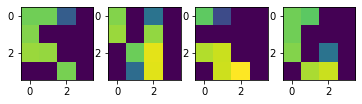

target:  1.0 predict:  0.9999983016436959 error:  1.698356304147275e-06
state:  14  state2:  15
reward:  1.0 action right
Q[state,action] after:  0.9999996773123022
*****************
done thru:  140
target:  0.8151205864747051 predict:  0.8150895144255818 error:  3.1072049123337386e-05
state:  0  state2:  4
reward:  0.0 action down
Q[state,action] after:  0.8151146827853717
*****************
target:  0.8151205864747051 predict:  0.8150342014198901 error:  8.638505481495251e-05
state:  4  state2:  4
reward:  0.0 action left
Q[state,action] after:  0.8151041733142903
*****************
hole:  5 0.0
target:  0.8151205864747051 predict:  0.8151146827853717 error:  5.903689333397466e-06
state:  0  state2:  4
reward:  0.0 action down
Q[state,action] after:  0.8151194647737318
*****************
target:  0.8151205864747051 predict:  0.8151041733142903 error:  1.6413160414785466e-05
state:  4  state2:  4
reward:  0.0 action left
Q[state,action] after:  0.8151174679742262
*****************
target

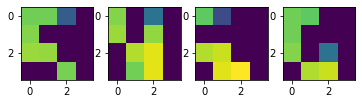

target:  1.0 predict:  0.9999996773123022 error:  3.2268769778465156e-07
state:  14  state2:  15
reward:  1.0 action right
Q[state,action] after:  0.9999999386893375
*****************
target:  0.8152584663431559 predict:  0.8152322286747451 error:  2.623766841081121e-05
state:  0  state2:  4
reward:  0.0 action down
Q[state,action] after:  0.8152534811861578
*****************
target:  0.7826433419387114 predict:  0.7824437612525235 error:  0.0001995806861879723
state:  4  state2:  0
reward:  0.0 action up
Q[state,action] after:  0.7826054216083357
*****************
target:  0.7512136856267926 predict:  0.7512111487210344 error:  2.5369057581325904e-06
state:  0  state2:  1
reward:  0.0 action right
Q[state,action] after:  0.7512132036146986
*****************
hole:  5 0.0
target:  0.7826433419387114 predict:  0.7824804544329392 error:  0.00016288750577220235
state:  0  state2:  0
reward:  0.0 action up
Q[state,action] after:  0.7826123933126147
*****************
target:  0.8152584663431

hole:  12 0.0
target:  0.815345267395181 predict:  0.8153346548840565 error:  1.0612511124441504e-05
state:  0  state2:  4
reward:  0.0 action down
Q[state,action] after:  0.8153432510180674
*****************
target:  0.8493194759154317 predict:  0.8493179868699803 error:  1.4890454513860618e-06
state:  4  state2:  8
reward:  0.0 action down
Q[state,action] after:  0.8493191929967959
*****************
target:  0.8847275535295314 predict:  0.884707787411908 error:  1.9766117623332136e-05
state:  8  state2:  9
reward:  0.0 action right
Q[state,action] after:  0.8847237979671829
*****************
target:  0.9215958791765501 predict:  0.9215912015932619 error:  4.67758328814849e-06
state:  9  state2:  10
reward:  0.0 action right
Q[state,action] after:  0.9215949904357253
*****************
target:  0.8847311908182963 predict:  0.0 error:  0.8847311908182963
state:  10  state2:  9
reward:  0.0 action left
Q[state,action] after:  0.71663226456282
*****************
target:  0.9215958791765501

target:  0.7514225930589075 predict:  0.7513750329738276 error:  4.7560085079889625e-05
state:  0  state2:  1
reward:  0.0 action right
Q[state,action] after:  0.7514135566427422
*****************
target:  0.7827420121662854 predict:  0.7827318677696953 error:  1.0144396590083815e-05
state:  1  state2:  0
reward:  0.0 action left
Q[state,action] after:  0.7827400847309333
*****************
target:  0.8153657977813527 predict:  0.8153562626732139 error:  9.535108138725157e-06
state:  0  state2:  4
reward:  0.0 action down
Q[state,action] after:  0.8153639861108063
*****************
target:  0.8493453431181838 predict:  0.849339372688909 error:  5.970429274748668e-06
state:  4  state2:  8
reward:  0.0 action down
Q[state,action] after:  0.8493442087366215
*****************
hole:  12 0.0
target:  0.8153704403871567 predict:  0.8153639861108063 error:  6.454276350376098e-06
state:  0  state2:  4
reward:  0.0 action down
Q[state,action] after:  0.8153692140746501
*****************
target:  

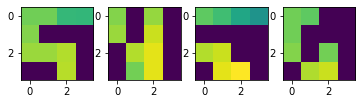

target:  1.0 predict:  0.9999999386893375 error:  6.131066254688733e-08
state:  14  state2:  15
reward:  1.0 action right
Q[state,action] after:  0.9999999883509741
*****************
done thru:  160
target:  0.7514304813416959 predict:  0.7514135566427422 error:  1.6924698953646455e-05
state:  0  state2:  1
reward:  0.0 action right
Q[state,action] after:  0.7514272656488947
*****************
target:  0.7827544455116641 predict:  0.7827400847309333 error:  1.4360780730804379e-05
state:  1  state2:  0
reward:  0.0 action left
Q[state,action] after:  0.7827517169633252
*****************
target:  0.7827544455116641 predict:  0.7826910293402629 error:  6.341617140115385e-05
state:  0  state2:  0
reward:  0.0 action left
Q[state,action] after:  0.7827423964390978
*****************
target:  0.7514416482847922 predict:  0.7514272656488947 error:  1.4382635897480789e-05
state:  0  state2:  1
reward:  0.0 action right
Q[state,action] after:  0.7514389155839717
*****************
hole:  5 0.0
tar

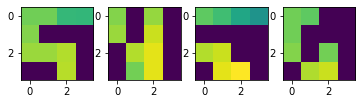

target:  1.0 predict:  0.9999999883509741 error:  1.1649025855042794e-08
state:  14  state2:  15
reward:  1.0 action right
Q[state,action] after:  0.9999999977866851
*****************
target:  0.782757102541155 predict:  0.7827390451648658 error:  1.805737628923776e-05
state:  0  state2:  0
reward:  0.0 action up
Q[state,action] after:  0.7827536716396601
*****************
target:  0.8153724467478978 predict:  0.8153719818137032 error:  4.6493419458837337e-07
state:  0  state2:  4
reward:  0.0 action down
Q[state,action] after:  0.8153723584104008
*****************
target:  0.8493463622504382 predict:  0.8493462986957269 error:  6.355471138252966e-08
state:  4  state2:  8
reward:  0.0 action down
Q[state,action] after:  0.8493463501750431
*****************
target:  0.8493463622504382 predict:  0.8493280803335058 error:  1.8281916932427755e-05
state:  8  state2:  8
reward:  0.0 action left
Q[state,action] after:  0.8493428886862211
*****************
hole:  12 0.0
target:  0.782757464073

target:  0.8493465071025992 predict:  0.849346491672554 error:  1.5430045130493397e-08
state:  4  state2:  8
reward:  0.0 action down
Q[state,action] after:  0.8493465041708906
*****************
target:  0.815372644004055 predict:  0.8152870997741473 error:  8.554422990769694e-05
state:  8  state2:  4
reward:  0.0 action up
Q[state,action] after:  0.8153563906003725
*****************
target:  0.815372644004055 predict:  0.8153710282595122 error:  1.6157445427156247e-06
state:  4  state2:  4
reward:  0.0 action left
Q[state,action] after:  0.8153723370125918
*****************
hole:  5 0.0
target:  0.7827577241167065 predict:  0.7827575714314883 error:  1.526852182465177e-07
state:  0  state2:  0
reward:  0.0 action up
Q[state,action] after:  0.782757695106515
*****************
target:  0.7761075286411596 predict:  0.7709178426983222 error:  0.005189685942837419
state:  0  state2:  1
reward:  0.0 action right
Q[state,action] after:  0.7751214883120205
*****************
hole:  5 0.0
targe

target:  0.8846331359466459 predict:  0.7866903836229583 error:  0.09794275232368765
state:  10  state2:  6
reward:  0.0 action up
Q[state,action] after:  0.8660240130051453
*****************
target:  0.9215999936493817 predict:  0.9214928499444229 error:  0.00010714370495878978
state:  6  state2:  10
reward:  0.0 action down
Q[state,action] after:  0.9215796363454396
*****************
target:  0.8847359876446571 predict:  0.8845166037575629 error:  0.00021938388709419332
state:  10  state2:  9
reward:  0.0 action left
Q[state,action] after:  0.8846943047061092
*****************
target:  0.8493465219673989 predict:  0.849287682456741 error:  5.8839510657882066e-05
state:  9  state2:  8
reward:  0.0 action left
Q[state,action] after:  0.8493353424603739
*****************
target:  0.8847359876446571 predict:  0.8847359603827072 error:  2.7261949919754613e-08
state:  8  state2:  9
reward:  0.0 action right
Q[state,action] after:  0.8847359824648866
*****************
target:  0.84934654316

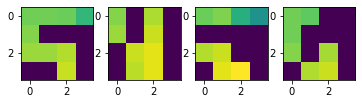

target:  1.0 predict:  0.9999999977866851 error:  2.2133148647185408e-09
state:  14  state2:  15
reward:  1.0 action right
Q[state,action] after:  0.9999999995794702
*****************
target:  0.7762481217152837 predict:  0.7761007653905421 error:  0.00014735632474160987
state:  0  state2:  1
reward:  0.0 action right
Q[state,action] after:  0.7762201240135828
*****************
target:  0.7762481217152837 predict:  0.7511538288449159 error:  0.025094292870367796
state:  1  state2:  1
reward:  0.0 action up
Q[state,action] after:  0.7714802060699137
*****************
target:  0.841183232022539 predict:  0.8085917934534205 error:  0.0325914385691185
state:  1  state2:  2
reward:  0.0 action right
Q[state,action] after:  0.8349908586944065
*****************
target:  0.884716450891622 predict:  0.8762325333568115 error:  0.008483917534810481
state:  2  state2:  6
reward:  0.0 action down
Q[state,action] after:  0.8831045065600079
*****************
target:  0.9215999936493817 predict:  0.92

target:  0.8847359927142441 predict:  0.8847359874576673 error:  5.256576729451012e-09
state:  8  state2:  9
reward:  0.0 action right
Q[state,action] after:  0.8847359917154946
*****************
target:  0.8493465520468747 predict:  0.8493444150321668 error:  2.1370147078592083e-06
state:  9  state2:  8
reward:  0.0 action left
Q[state,action] after:  0.8493461460140802
*****************
hole:  12 0.0
target:  0.8125205671500951 predict:  0.8104377098818204 error:  0.0020828572682747293
state:  0  state2:  1
reward:  0.0 action right
Q[state,action] after:  0.8121248242691229
*****************
hole:  5 0.0
target:  0.7827577728385094 predict:  0.7827577689049299 error:  3.933579573178747e-09
state:  0  state2:  0
reward:  0.0 action up
Q[state,action] after:  0.7827577720911293
*****************
target:  0.8153726849292638 predict:  0.815372680040114 error:  4.889149862741249e-09
state:  0  state2:  4
reward:  0.0 action down
Q[state,action] after:  0.8153726840003254
****************

hole:  5 0.0
target:  0.815372690850039 predict:  0.8153726902161882 error:  6.338508606873461e-10
state:  0  state2:  4
reward:  0.0 action down
Q[state,action] after:  0.8153726907296074
*****************
target:  0.815372690850039 predict:  0.8153726880552417 error:  2.794797393512738e-09
state:  4  state2:  4
reward:  0.0 action left
Q[state,action] after:  0.8153726903190276
*****************
target:  0.7827577831004231 predict:  0.782757773346584 error:  9.753839069759351e-09
state:  4  state2:  0
reward:  0.0 action up
Q[state,action] after:  0.7827577812471936
*****************
target:  0.815372690850039 predict:  0.8153726907296074 error:  1.2043166464081878e-10
state:  0  state2:  4
reward:  0.0 action down
Q[state,action] after:  0.815372690827157
*****************
hole:  5 0.0
target:  0.7827577831940707 predict:  0.7827577751630039 error:  8.031066811575727e-09
state:  0  state2:  0
reward:  0.0 action left
Q[state,action] after:  0.782757781668168
*****************
target

target:  0.8847358598578886 predict:  0.88473523965115 error:  6.202067386329446e-07
state:  2  state2:  6
reward:  0.0 action down
Q[state,action] after:  0.8847357420186083
*****************
hole:  7 0.0
target:  0.782757783784898 predict:  0.7827577832204257 error:  5.644723577447053e-10
state:  0  state2:  0
reward:  0.0 action left
Q[state,action] after:  0.7827577836776483
*****************
target:  0.8153726915982866 predict:  0.8153726914426022 error:  1.5568446531943891e-10
state:  0  state2:  4
reward:  0.0 action down
Q[state,action] after:  0.8153726915687066
*****************
target:  0.8153726915982866 predict:  0.8153726912470424 error:  3.5124425590282726e-10
state:  4  state2:  4
reward:  0.0 action left
Q[state,action] after:  0.8153726915315502
*****************
target:  0.8493465540390583 predict:  0.8493465537482152 error:  2.9084312735960793e-10
state:  4  state2:  8
reward:  0.0 action down
Q[state,action] after:  0.8493465539837981
*****************
target:  0.8

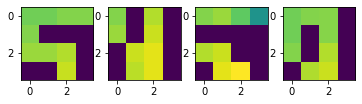

target:  1.0 predict:  0.9999999995794702 error:  4.2052983317830694e-10
state:  14  state2:  15
reward:  1.0 action right
Q[state,action] after:  0.9999999999200994
*****************
target:  0.7827577841048214 predict:  0.7827577840236586 error:  8.116285421522207e-11
state:  0  state2:  0
reward:  0.0 action left
Q[state,action] after:  0.7827577840894004
*****************
target:  0.7827577841048214 predict:  0.7827577839310663 error:  1.7375512140205274e-10
state:  0  state2:  0
reward:  0.0 action up
Q[state,action] after:  0.782757784071808
*****************
target:  0.7827577841048214 predict:  0.782757784071808 error:  3.301348083795119e-11
state:  0  state2:  0
reward:  0.0 action up
Q[state,action] after:  0.7827577840985489
*****************
target:  0.815372691954843 predict:  0.8153726917758557 error:  1.789872694502037e-10
state:  0  state2:  4
reward:  0.0 action down
Q[state,action] after:  0.8153726919208354
*****************
target:  0.8493465541306787 predict:  0.84

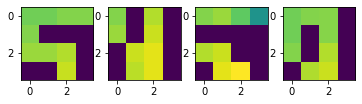

target:  1.0 predict:  0.9999999999200994 error:  7.990064165852573e-11
state:  14  state2:  15
reward:  1.0 action right
Q[state,action] after:  0.9999999999848189
*****************
target:  0.8153726919634359 predict:  0.8153726919208354 error:  4.2600478700194344e-11
state:  0  state2:  4
reward:  0.0 action down
Q[state,action] after:  0.8153726919553418
*****************
target:  0.8153726919634359 predict:  0.8153726915315502 error:  4.318856383633829e-10
state:  4  state2:  4
reward:  0.0 action left
Q[state,action] after:  0.8153726918813776
*****************
target:  0.8493465541377753 predict:  0.8493465541285791 error:  9.196199357575097e-12
state:  4  state2:  8
reward:  0.0 action down
Q[state,action] after:  0.849346554136028
*****************
target:  0.8493465541377753 predict:  0.8493465527841823 error:  1.3535930154517928e-09
state:  8  state2:  8
reward:  0.0 action left
Q[state,action] after:  0.8493465538805925
*****************
target:  0.8847359983725948 predict:

target:  0.8153726963428778 predict:  0.8153726946767418 error:  1.6661360069392117e-09
state:  0  state2:  4
reward:  0.0 action down
Q[state,action] after:  0.8153726960263119
*****************
target:  0.8493465593771874 predict:  0.8493465586904977 error:  6.866897050983312e-10
state:  4  state2:  8
reward:  0.0 action down
Q[state,action] after:  0.8493465592467163
*****************
target:  0.8847359998294465 predict:  0.8847359993512369 error:  4.782095830435651e-10
state:  8  state2:  9
reward:  0.0 action right
Q[state,action] after:  0.8847359997385866
*****************
target:  0.9215999999224432 predict:  0.9215999998223402 error:  1.0010303697072231e-10
state:  9  state2:  10
reward:  0.0 action right
Q[state,action] after:  0.9215999999034237
*****************
target:  0.9599999999854262 predict:  0.9599999999192117 error:  6.621447834476157e-11
state:  10  state2:  14
reward:  0.0 action down
Q[state,action] after:  0.9599999999728455
*****************
target:  0.9599999

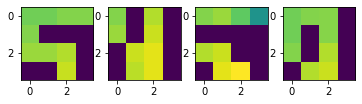

target:  1.0 predict:  0.9999999999848189 error:  1.5181078616421928e-11
state:  14  state2:  15
reward:  1.0 action right
Q[state,action] after:  0.9999999999971156
*****************
target:  0.7827577881852594 predict:  0.7827577859889024 error:  2.1963569851735087e-09
state:  0  state2:  0
reward:  0.0 action left
Q[state,action] after:  0.7827577877679516
*****************
target:  0.7827577881852594 predict:  0.7827577877679516 error:  4.173078549385423e-10
state:  0  state2:  0
reward:  0.0 action left
Q[state,action] after:  0.782757788105971
*****************
target:  0.7827577881852594 predict:  0.782757788105971 error:  7.928846468274742e-11
state:  0  state2:  0
reward:  0.0 action left
Q[state,action] after:  0.7827577881701946
*****************
target:  0.8153726968768477 predict:  0.8153726960263119 error:  8.50535752938697e-10
state:  0  state2:  4
reward:  0.0 action down
Q[state,action] after:  0.8153726967152458
*****************
target:  0.8493465597490432 predict:  

target:  0.9215999999739316 predict:  0.9215999999605351 error:  1.3396506126639451e-11
state:  9  state2:  10
reward:  0.0 action right
Q[state,action] after:  0.9215999999713863
*****************
target:  0.959999999997231 predict:  0.9599999999728455 error:  2.438549362437925e-11
state:  10  state2:  14
reward:  0.0 action down
Q[state,action] after:  0.9599999999925977
*****************
target:  0.9213713019018756 predict:  0.9150520425026913 error:  0.006319259399184207
state:  14  state2:  13
reward:  0.0 action left
Q[state,action] after:  0.9201706426160305
*****************
target:  0.959999999997231 predict:  0.9597617728144537 error:  0.00023822718277721755
state:  13  state2:  14
reward:  0.0 action right
Q[state,action] after:  0.9599547368325033
*****************
target:  0.9215999999928938 predict:  0.9215974572068723 error:  2.542786021519916e-06
state:  14  state2:  10
reward:  0.0 action up
Q[state,action] after:  0.9215995168635497
*****************
hole:  11 0.0
don

target:  0.959999999997231 predict:  0.9599547368325033 error:  4.526316472763803e-05
state:  13  state2:  14
reward:  0.0 action right
Q[state,action] after:  0.9599913999959327
*****************
goal:  15 1.0
show q
left
down
right
up


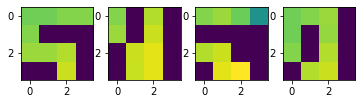

target:  1.0 predict:  0.9999999999971156 error:  2.8843594179761567e-12
state:  14  state2:  15
reward:  1.0 action right
Q[state,action] after:  0.999999999999452
*****************
target:  0.7827577896688247 predict:  0.7827577896653501 error:  3.47455397786689e-12
state:  0  state2:  0
reward:  0.0 action left
Q[state,action] after:  0.7827577896681646
*****************
target:  0.7827577896688247 predict:  0.7827577896681646 error:  6.601386104421181e-13
state:  0  state2:  0
reward:  0.0 action left
Q[state,action] after:  0.7827577896686992
*****************
target:  0.7827577896688247 predict:  0.7827577896686992 error:  1.254552017826427e-13
state:  0  state2:  0
reward:  0.0 action left
Q[state,action] after:  0.7827577896688008
*****************
target:  0.8153726975738511 predict:  0.8153726975716924 error:  2.1587176490811544e-12
state:  0  state2:  4
reward:  0.0 action down
Q[state,action] after:  0.815372697573441
*****************
hole:  5 0.0
target:  0.78275778967050

target:  0.7809759787304511 predict:  0.0 error:  0.7809759787304511
state:  3  state2:  3
reward:  0.0 action up
Q[state,action] after:  0.6325905427716655
*****************
target:  0.7809759787304511 predict:  0.6325905427716655 error:  0.14838543595878562
state:  3  state2:  3
reward:  0.0 action up
Q[state,action] after:  0.7527827458982819
*****************
hole:  7 0.0
target:  0.8153726975866985 predict:  0.8153726975862605 error:  4.3798298321462426e-13
state:  0  state2:  4
reward:  0.0 action down
Q[state,action] after:  0.8153726975866152
*****************
target:  0.7827577896831506 predict:  0.7827577896783878 error:  4.762745753339459e-12
state:  4  state2:  0
reward:  0.0 action up
Q[state,action] after:  0.7827577896822456
*****************
target:  0.8153726975866985 predict:  0.8153726975866152 error:  8.326672684688674e-14
state:  0  state2:  4
reward:  0.0 action down
Q[state,action] after:  0.8153726975866826
*****************
target:  0.8153726975866985 predict: 

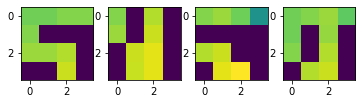

target:  1.0 predict:  0.999999999999452 error:  5.480060849549773e-13
state:  14  state2:  15
reward:  1.0 action right
Q[state,action] after:  0.9999999999998959
*****************
done thru:  240
target:  0.7827577896859367 predict:  0.7827577896854587 error:  4.779510121011299e-13
state:  0  state2:  0
reward:  0.0 action left
Q[state,action] after:  0.7827577896858459
*****************
target:  0.8153726975895347 predict:  0.8153726975895174 error:  1.7319479184152442e-14
state:  0  state2:  4
reward:  0.0 action down
Q[state,action] after:  0.8153726975895313
*****************
target:  0.8153726975895347 predict:  0.8153726975890543 error:  4.803935027553052e-13
state:  4  state2:  4
reward:  0.0 action left
Q[state,action] after:  0.8153726975894434
*****************
target:  0.8493465599895741 predict:  0.8493465599890987 error:  4.75397499144492e-13
state:  4  state2:  8
reward:  0.0 action down
Q[state,action] after:  0.8493465599894837
*****************
hole:  12 0.0
target: 

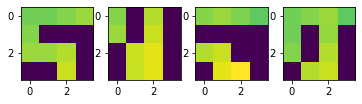

target:  1.0 predict:  0.9999999999998959 error:  1.0413891970983968e-13
state:  14  state2:  15
reward:  1.0 action right
Q[state,action] after:  0.9999999999999802
*****************
target:  0.7827577896863077 predict:  0.7827577896859303 error:  3.773648060700907e-13
state:  0  state2:  0
reward:  0.0 action left
Q[state,action] after:  0.782757789686236
*****************
target:  0.8153726975899745 predict:  0.8153726975899039 error:  7.061018436615996e-14
state:  0  state2:  4
reward:  0.0 action down
Q[state,action] after:  0.8153726975899611
*****************
target:  0.8493465599895741 predict:  0.8493465599895569 error:  1.7208456881689926e-14
state:  4  state2:  8
reward:  0.0 action down
Q[state,action] after:  0.8493465599895709
*****************
hole:  12 0.0
target:  0.7827577896863627 predict:  0.7827577896862961 error:  6.661338147750939e-14
state:  0  state2:  0
reward:  0.0 action up
Q[state,action] after:  0.78275778968635
*****************
target:  0.782757789686362

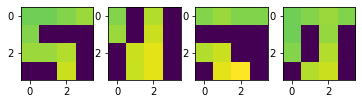

target:  1.0 predict:  0.9999999999999802 error:  1.9761969838327786e-14
state:  14  state2:  15
reward:  1.0 action right
Q[state,action] after:  0.9999999999999962
*****************
target:  0.8153726975899904 predict:  0.8153726975899829 error:  7.549516567451064e-15
state:  0  state2:  4
reward:  0.0 action down
Q[state,action] after:  0.815372697589989
*****************
target:  0.8153726975899904 predict:  0.8153726975898168 error:  1.7363888105137448e-13
state:  4  state2:  4
reward:  0.0 action left
Q[state,action] after:  0.8153726975899575
*****************
target:  0.7827577896863894 predict:  0.7827577896862737 error:  1.156852391659413e-13
state:  4  state2:  0
reward:  0.0 action up
Q[state,action] after:  0.7827577896863674
*****************
target:  0.8153726975899904 predict:  0.815372697589989 error:  1.4432899320127035e-15
state:  0  state2:  4
reward:  0.0 action down
Q[state,action] after:  0.8153726975899902
*****************
hole:  5 0.0
target:  0.81537269758999

hole:  11 0.0
target:  0.8153726975970627 predict:  0.8153726975960969 error:  9.657830091214237e-13
state:  0  state2:  4
reward:  0.0 action down
Q[state,action] after:  0.8153726975968791
*****************
target:  0.8493465599980892 predict:  0.8493465599969403 error:  1.148858785882112e-12
state:  4  state2:  8
reward:  0.0 action down
Q[state,action] after:  0.8493465599978709
*****************
hole:  12 0.0
target:  0.7827577896930039 predict:  0.7827577896863602 error:  6.643685601659399e-12
state:  0  state2:  0
reward:  0.0 action up
Q[state,action] after:  0.7827577896917416
*****************
target:  0.8153726933211781 predict:  0.8153726914226759 error:  1.8985022443018806e-09
state:  0  state2:  1
reward:  0.0 action right
Q[state,action] after:  0.8153726929604627
*****************
hole:  5 0.0
target:  0.815372697597956 predict:  0.8153726975968791 error:  1.0769163338864018e-12
state:  0  state2:  4
reward:  0.0 action down
Q[state,action] after:  0.8153726975977514
**

target:  0.9215999999999932 predict:  0.9215999966861351 error:  3.3138580768365955e-09
state:  14  state2:  10
reward:  0.0 action up
Q[state,action] after:  0.9215999993703602
*****************
target:  0.9599999999999963 predict:  0.959999999999993 error:  3.3306690738754696e-15
state:  10  state2:  14
reward:  0.0 action down
Q[state,action] after:  0.9599999999999956
*****************
goal:  15 1.0
show q
left
down
right
up


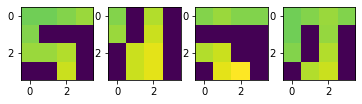

target:  1.0 predict:  0.9999999999999962 error:  3.774758283725532e-15
state:  14  state2:  15
reward:  1.0 action right
Q[state,action] after:  0.9999999999999993
*****************
target:  0.8153726972497909 predict:  0.8153726962282477 error:  1.021543183377105e-09
state:  0  state2:  1
reward:  0.0 action right
Q[state,action] after:  0.8153726970556977
*****************
target:  0.8493465599409282 predict:  0.8493465596351989 error:  3.057293307406894e-10
state:  1  state2:  2
reward:  0.0 action right
Q[state,action] after:  0.8493465598828397
*****************
target:  0.8847359999984902 predict:  0.884735999938467 error:  6.002320862563693e-11
state:  2  state2:  6
reward:  0.0 action down
Q[state,action] after:  0.8847359999870857
*****************
target:  0.9215999999999958 predict:  0.9215999999984273 error:  1.5684120668879586e-12
state:  6  state2:  10
reward:  0.0 action down
Q[state,action] after:  0.9215999999996978
*****************
hole:  11 0.0
target:  0.815372697

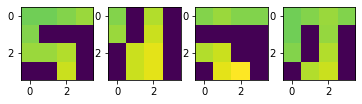

target:  1.0 predict:  0.9999999999999993 error:  6.661338147750939e-16
state:  14  state2:  15
reward:  1.0 action right
Q[state,action] after:  0.9999999999999999
*****************
target:  0.8153726975997561 predict:  0.8153726975990787 error:  6.77347067323808e-13
state:  0  state2:  4
reward:  0.0 action down
Q[state,action] after:  0.8153726975996274
*****************
target:  0.849346559999908 predict:  0.849346559999746 error:  1.6209256159527285e-13
state:  4  state2:  8
reward:  0.0 action down
Q[state,action] after:  0.8493465599998773
*****************
target:  0.8153726975998822 predict:  0.8153726975876673 error:  1.2214895761530897e-11
state:  8  state2:  4
reward:  0.0 action up
Q[state,action] after:  0.8153726975975614
*****************
hole:  5 0.0
target:  0.815372697487526 predict:  0.8153726970556977 error:  4.3182835085531224e-10
state:  0  state2:  1
reward:  0.0 action right
Q[state,action] after:  0.8153726974054787
*****************
hole:  5 0.0
target:  0.81

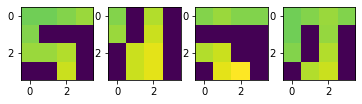

target:  1.0 predict:  0.9999999999999999 error:  1.1102230246251565e-16
state:  14  state2:  15
reward:  1.0 action right
Q[state,action] after:  1.0
*****************
target:  0.8153726975999571 predict:  0.8153726975999034 error:  5.3734794391857577e-14
state:  0  state2:  4
reward:  0.0 action down
Q[state,action] after:  0.8153726975999469
*****************
hole:  5 0.0
target:  0.782757789695949 predict:  0.7827577896953511 error:  5.978550987606468e-13
state:  0  state2:  0
reward:  0.0 action left
Q[state,action] after:  0.7827577896958354
*****************
target:  0.8153726975689896 predict:  0.8153726975505496 error:  1.843991626060415e-11
state:  0  state2:  1
reward:  0.0 action right
Q[state,action] after:  0.815372697565486
*****************
target:  0.782757789695949 predict:  0.7827577896940411 error:  1.9079182678183315e-12
state:  1  state2:  0
reward:  0.0 action left
Q[state,action] after:  0.7827577896955865
*****************
target:  0.782757789695949 predict:  0

target:  0.8847359999999993 predict:  0.884735998037422 error:  1.9625773228781895e-09
state:  10  state2:  9
reward:  0.0 action left
Q[state,action] after:  0.8847359996271096
*****************
target:  0.8493465599999988 predict:  0.8493465555428559 error:  4.4571428770012744e-09
state:  9  state2:  8
reward:  0.0 action left
Q[state,action] after:  0.8493465591531416
*****************
target:  0.8847359999999993 predict:  0.8847359999999987 error:  5.551115123125783e-16
state:  8  state2:  9
reward:  0.0 action right
Q[state,action] after:  0.8847359999999992
*****************
target:  0.8493465599999992 predict:  0.8493465591531416 error:  8.468575840581138e-10
state:  9  state2:  8
reward:  0.0 action left
Q[state,action] after:  0.8493465598390962
*****************
hole:  12 0.0
target:  0.7827577896959947 predict:  0.7827577896959449 error:  4.984901380566953e-14
state:  0  state2:  0
reward:  0.0 action left
Q[state,action] after:  0.7827577896959853
*****************
target: 

target:  0.96 predict:  0.9599999999999996 error:  3.3306690738754696e-16
state:  10  state2:  14
reward:  0.0 action down
Q[state,action] after:  0.9599999999999999
*****************
target:  0.96 predict:  0.9599999999203479 error:  7.965206272331216e-11
state:  14  state2:  14
reward:  0.0 action down
Q[state,action] after:  0.9599999999848661
*****************
target:  0.96 predict:  0.9599999999848661 error:  1.513389413787536e-11
state:  14  state2:  14
reward:  0.0 action down
Q[state,action] after:  0.9599999999971245
*****************
target:  0.9215999999999999 predict:  0.9215999998803681 error:  1.1963174895157636e-10
state:  14  state2:  10
reward:  0.0 action up
Q[state,action] after:  0.9215999999772698
*****************
target:  0.8847359999999892 predict:  0.8847359994914618 error:  5.085274423777264e-10
state:  10  state2:  6
reward:  0.0 action up
Q[state,action] after:  0.8847359999033689
*****************
target:  0.8493465599998208 predict:  0.8434744784449376 err

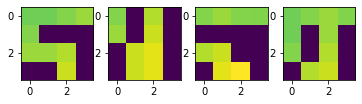

target:  0.8493465599999995 predict:  0.8493465599999993 error:  2.220446049250313e-16
state:  4  state2:  8
reward:  0.0 action down
Q[state,action] after:  0.8493465599999995
*****************
target:  0.8847359999999997 predict:  0.8847359999999995 error:  2.220446049250313e-16
state:  8  state2:  9
reward:  0.0 action right
Q[state,action] after:  0.8847359999999997
*****************
target:  0.9216 predict:  0.9215999999999998 error:  2.220446049250313e-16
state:  9  state2:  10
reward:  0.0 action right
Q[state,action] after:  0.9216
*****************
target:  0.96 predict:  0.9599999999999802 error:  1.9761969838327786e-14
state:  14  state2:  14
reward:  0.0 action down
Q[state,action] after:  0.9599999999999962
*****************
goal:  15 1.0
show q
left
down
right
up


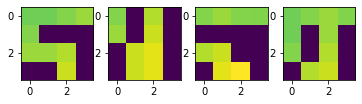

target:  0.7827577896959993 predict:  0.782757789695996 error:  3.3306690738754696e-15
state:  0  state2:  0
reward:  0.0 action left
Q[state,action] after:  0.7827577896959986
*****************
target:  0.8153726975992932 predict:  0.8153726975988562 error:  4.369837824924616e-13
state:  0  state2:  1
reward:  0.0 action right
Q[state,action] after:  0.8153726975992102
*****************
target:  0.8153726975992932 predict:  0.8153726197879625 error:  7.781133071205204e-08
state:  1  state2:  1
reward:  0.0 action up
Q[state,action] after:  0.8153726828151404
*****************
target:  0.8493465599999835 predict:  0.8493465599992638 error:  7.19757586864489e-13
state:  1  state2:  2
reward:  0.0 action right
Q[state,action] after:  0.8493465599998468
*****************
target:  0.8153641788125852 predict:  0.8151823737547473 error:  0.00018180505783782497
state:  2  state2:  3
reward:  0.0 action right
Q[state,action] after:  0.815329635851596
*****************
hole:  7 0.0
target:  0.8

target:  0.8153726976 predict:  0.8153726975999998 error:  2.220446049250313e-16
state:  4  state2:  4
reward:  0.0 action left
Q[state,action] after:  0.8153726976
*****************
target:  0.782757789696 predict:  0.7827577896959985 error:  1.4432899320127035e-15
state:  4  state2:  0
reward:  0.0 action up
Q[state,action] after:  0.7827577896959997
*****************
target:  0.782757789696 predict:  0.7827577896959996 error:  3.3306690738754696e-16
state:  0  state2:  0
reward:  0.0 action left
Q[state,action] after:  0.7827577896959999
*****************
target:  0.84934656 predict:  0.8493465599999994 error:  5.551115123125783e-16
state:  8  state2:  8
reward:  0.0 action left
Q[state,action] after:  0.8493465599999999
*****************
hole:  5 0.0
hole:  5 0.0
target:  0.782757789696 predict:  0.7827577896959999 error:  1.1102230246251565e-16
state:  0  state2:  0
reward:  0.0 action left
Q[state,action] after:  0.782757789696
*****************
target:  0.782757789696 predict:  

hole:  5 0.0
done thru:  330
hole:  5 0.0
target:  0.8493465599999999 predict:  0.8493465599999998 error:  1.1102230246251565e-16
state:  1  state2:  2
reward:  0.0 action right
Q[state,action] after:  0.8493465599999999
*****************
hole:  7 0.0
target:  0.8153726975999999 predict:  0.8153726975999998 error:  1.1102230246251565e-16
state:  0  state2:  1
reward:  0.0 action right
Q[state,action] after:  0.8153726975999999
*****************
target:  0.8153726975999999 predict:  0.8153726975963356 error:  3.664291092775329e-12
state:  1  state2:  1
reward:  0.0 action up
Q[state,action] after:  0.8153726975993036
*****************
target:  0.8153641788125852 predict:  0.815329635851596 error:  3.4542960989147886e-05
state:  2  state2:  3
reward:  0.0 action right
Q[state,action] after:  0.8153576156499972
*****************
target:  0.8493465599999999 predict:  0.8493376862631096 error:  8.873736890291362e-06
state:  3  state2:  2
reward:  0.0 action left
Q[state,action] after:  0.84

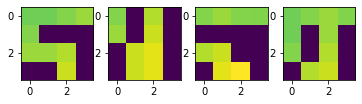

hole:  12 0.0
target:  0.8153726975999999 predict:  0.8153726975993036 error:  6.962208587424357e-13
state:  1  state2:  1
reward:  0.0 action up
Q[state,action] after:  0.8153726975998676
*****************
target:  0.782757789696 predict:  0.7827577896959994 error:  5.551115123125783e-16
state:  1  state2:  0
reward:  0.0 action left
Q[state,action] after:  0.7827577896959999
*****************
hole:  5 0.0
target:  0.84934656 predict:  0.8493465599999924 error:  7.549516567451064e-15
state:  9  state2:  8
reward:  0.0 action left
Q[state,action] after:  0.8493465599999985
*****************
hole:  5 0.0
target:  0.782757789696 predict:  0.7827577896959999 error:  1.1102230246251565e-16
state:  1  state2:  0
reward:  0.0 action left
Q[state,action] after:  0.782757789696
*****************
hole:  5 0.0
hole:  5 0.0
target:  0.884736 predict:  0.8847359999999999 error:  1.1102230246251565e-16
state:  2  state2:  6
reward:  0.0 action down
Q[state,action] after:  0.884736
*****************

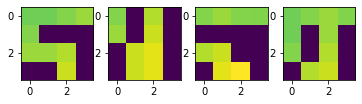

target:  0.84934656 predict:  0.8493465599999999 error:  1.1102230246251565e-16
state:  1  state2:  2
reward:  0.0 action right
Q[state,action] after:  0.84934656
*****************
target:  0.8153726976 predict:  0.8153708366644222 error:  1.8609355777465808e-06
state:  2  state2:  1
reward:  0.0 action left
Q[state,action] after:  0.8153723440222402
*****************
target:  0.8153710790303911 predict:  0.8153576156499972 error:  1.3463380393874402e-05
state:  2  state2:  3
reward:  0.0 action right
Q[state,action] after:  0.8153685209881163
*****************
target:  0.8153710790303911 predict:  0.8119162772496064 error:  0.003454801780784722
state:  3  state2:  3
reward:  0.0 action up
Q[state,action] after:  0.814714666692042
*****************
target:  0.84934656 predict:  0.8493448739899907 error:  1.6860100092719321e-06
state:  3  state2:  2
reward:  0.0 action left
Q[state,action] after:  0.8493462396580982
*****************
hole:  5 0.0
done thru:  340
target:  0.96 predict:  

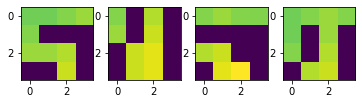

hole:  5 0.0
hole:  5 0.0
target:  0.9216 predict:  0.9215999999998441 error:  1.5587531265737198e-13
state:  14  state2:  10
reward:  0.0 action up
Q[state,action] after:  0.9215999999999703
*****************
target:  0.884736 predict:  0.8847359999999824 error:  1.7541523789077473e-14
state:  10  state2:  9
reward:  0.0 action left
Q[state,action] after:  0.8847359999999966
*****************
target:  0.884736 predict:  0.8847359999965116 error:  3.488320743372242e-12
state:  10  state2:  6
reward:  0.0 action up
Q[state,action] after:  0.8847359999993372
*****************
target:  0.884736 predict:  0.8847359999999966 error:  3.3306690738754696e-15
state:  10  state2:  9
reward:  0.0 action left
Q[state,action] after:  0.8847359999999993
*****************
target:  0.884736 predict:  0.8847359999993372 error:  6.628031457012185e-13
state:  10  state2:  6
reward:  0.0 action up
Q[state,action] after:  0.8847359999998741
*****************
hole:  5 0.0
hole:  12 0.0
done thru:  350
targe

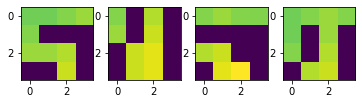

target:  0.9215999979557316 predict:  0.9215999865432531 error:  1.1412478406747084e-08
state:  9  state2:  13
reward:  0.0 action down
Q[state,action] after:  0.9215999957873606
*****************
target:  0.9215999979557316 predict:  0.9215996861118536 error:  3.1184387794258583e-07
state:  13  state2:  13
reward:  0.0 action down
Q[state,action] after:  0.9215999387053947
*****************
hole:  12 0.0
hole:  5 0.0
goal:  15 1.0
show q
left
down
right
up


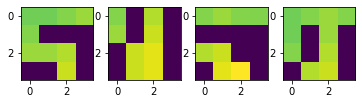

hole:  5 0.0
hole:  5 0.0
hole:  12 0.0
hole:  12 0.0
done thru:  360
hole:  5 0.0
hole:  12 0.0
hole:  7 0.0
hole:  12 0.0
hole:  5 0.0
hole:  7 0.0
hole:  12 0.0
hole:  5 0.0
hole:  5 0.0
hole:  12 0.0
done thru:  370
target:  0.9215999979557316 predict:  0.9215999957873606 error:  2.1683709272579677e-09
state:  9  state2:  13
reward:  0.0 action down
Q[state,action] after:  0.9215999975437411
*****************
target:  0.884736 predict:  0.8847214370000842 error:  1.4562999915757047e-05
state:  13  state2:  9
reward:  0.0 action up
Q[state,action] after:  0.8847332330300159
*****************
target:  0.84934656 predict:  0.8493465599999985 error:  1.4432899320127035e-15
state:  9  state2:  8
reward:  0.0 action left
Q[state,action] after:  0.8493465599999998
*****************
hole:  12 0.0
target:  0.84934656 predict:  0.8493465599999998 error:  2.220446049250313e-16
state:  9  state2:  8
reward:  0.0 action left
Q[state,action] after:  0.84934656
*****************
hole:  5 0.0
hole

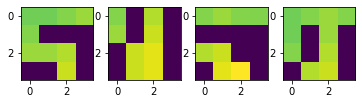

hole:  5 0.0
target:  0.8153726976 predict:  0.8153726304202257 error:  6.71797742990421e-08
state:  2  state2:  1
reward:  0.0 action left
Q[state,action] after:  0.8153726848358429
*****************
hole:  5 0.0
hole:  11 0.0
hole:  12 0.0
done thru:  400
hole:  12 0.0
hole:  5 0.0
hole:  5 0.0
target:  0.9215999999262018 predict:  0.921328413382007 error:  0.00027158654419479067
state:  14  state2:  13
reward:  0.0 action left
Q[state,action] after:  0.9215483984828048
*****************
target:  0.884736 predict:  0.8847332330300159 error:  2.766969984024925e-06
state:  13  state2:  9
reward:  0.0 action up
Q[state,action] after:  0.884735474275703
*****************
target:  0.9215999999262018 predict:  0.9215999992821031 error:  6.440986632938461e-10
state:  9  state2:  13
reward:  0.0 action down
Q[state,action] after:  0.921599999803823
*****************
target:  0.96 predict:  0.9599999999231269 error:  7.687306347037293e-11
state:  13  state2:  14
reward:  0.0 action right
Q[st

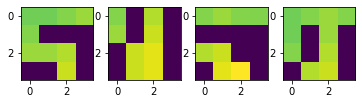

hole:  12 0.0
target:  0.8153726391696371 predict:  0.8153716549458792 error:  9.84223757938274e-07
state:  2  state2:  3
reward:  0.0 action right
Q[state,action] after:  0.8153724521671231
*****************
target:  0.8153726391696371 predict:  0.814714666692042 error:  0.0006579724775951368
state:  3  state2:  3
reward:  0.0 action up
Q[state,action] after:  0.815247624398894
*****************
target:  0.8153726391696371 predict:  0.8119231087188974 error:  0.0034495304507397018
state:  3  state2:  3
reward:  0.0 action right
Q[state,action] after:  0.8147172283839965
*****************
target:  0.8153726391696371 predict:  0.815247624398894 error:  0.00012501477074311484
state:  3  state2:  3
reward:  0.0 action up
Q[state,action] after:  0.8153488863631959
*****************
target:  0.8153726391696371 predict:  0.8147172283839965 error:  0.0006554107856405755
state:  3  state2:  3
reward:  0.0 action right
Q[state,action] after:  0.8152481111203654
*****************
target:  0.8493

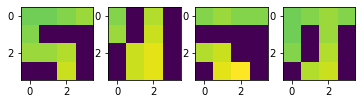

hole:  5 0.0
hole:  11 0.0
target:  0.884736 predict:  0.8847359999999954 error:  4.551914400963142e-15
state:  10  state2:  6
reward:  0.0 action up
Q[state,action] after:  0.8847359999999991
*****************
hole:  11 0.0
hole:  11 0.0
target:  0.9215999999973358 predict:  0.921599999803823 error:  1.9351276137058449e-10
state:  9  state2:  13
reward:  0.0 action down
Q[state,action] after:  0.9215999999605683
*****************
target:  0.884736 predict:  0.884735474275703 error:  5.257242969847198e-07
state:  13  state2:  9
reward:  0.0 action up
Q[state,action] after:  0.8847359001123836
*****************
target:  0.9215999999973358 predict:  0.9215999999605683 error:  3.6767477951116234e-11
state:  9  state2:  13
reward:  0.0 action down
Q[state,action] after:  0.9215999999903499
*****************
target:  0.9215999999973358 predict:  0.9215999387053947 error:  6.129194107806768e-08
state:  13  state2:  13
reward:  0.0 action down
Q[state,action] after:  0.921599988351867
*******

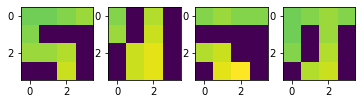

hole:  5 0.0
hole:  12 0.0
target:  0.84934656 predict:  0.8493465599999112 error:  8.881784197001252e-14
state:  2  state2:  2
reward:  0.0 action up
Q[state,action] after:  0.8493465599999831
*****************
hole:  7 0.0
hole:  5 0.0
hole:  5 0.0
goal:  15 1.0
show q
left
down
right
up


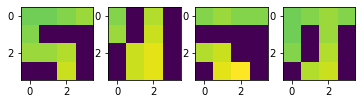

target:  0.884736 predict:  0.8847359999999991 error:  8.881784197001252e-16
state:  10  state2:  6
reward:  0.0 action up
Q[state,action] after:  0.8847359999999997
*****************
target:  0.84934656 predict:  0.8493465500271132 error:  9.97288673865171e-09
state:  6  state2:  2
reward:  0.0 action up
Q[state,action] after:  0.8493465581051515
*****************
hole:  7 0.0
hole:  5 0.0
done thru:  440
target:  0.84934656 predict:  0.8493465599999831 error:  1.687538997430238e-14
state:  2  state2:  2
reward:  0.0 action up
Q[state,action] after:  0.8493465599999968
*****************
target:  0.84934656 predict:  0.8493465599999968 error:  3.219646771412954e-15
state:  2  state2:  2
reward:  0.0 action up
Q[state,action] after:  0.8493465599999993
*****************
target:  0.8153726976 predict:  0.8153726848358429 error:  1.2764157064637516e-08
state:  2  state2:  1
reward:  0.0 action left
Q[state,action] after:  0.8153726951748101
*****************
target:  0.84934656 predict:  

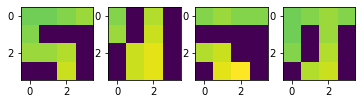

done thru:  450
hole:  5 0.0
hole:  12 0.0
hole:  5 0.0
hole:  5 0.0
hole:  12 0.0
hole:  12 0.0
hole:  5 0.0
goal:  15 1.0
show q
left
down
right
up


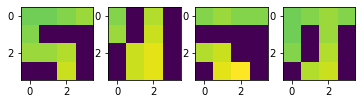

hole:  5 0.0
hole:  5 0.0
done thru:  460
target:  0.9215999999994938 predict:  0.9215999999960085 error:  3.485323141205754e-12
state:  9  state2:  13
reward:  0.0 action down
Q[state,action] after:  0.9215999999988316
*****************
target:  0.9215999999994938 predict:  0.921599988351867 error:  1.1647626863009464e-08
state:  13  state2:  13
reward:  0.0 action down
Q[state,action] after:  0.9215999977864447
*****************
target:  0.96 predict:  0.9599999999994727 error:  5.272449143944868e-13
state:  13  state2:  14
reward:  0.0 action right
Q[state,action] after:  0.9599999999998998
*****************
goal:  15 1.0
show q
left
down
right
up


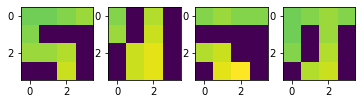

hole:  12 0.0
hole:  5 0.0
hole:  12 0.0
target:  0.9215999999999038 predict:  0.9215999999988316 error:  1.0722533971829762e-12
state:  9  state2:  13
reward:  0.0 action down
Q[state,action] after:  0.9215999999997001
*****************
target:  0.96 predict:  0.9599999999998998 error:  1.0014211682118912e-13
state:  13  state2:  14
reward:  0.0 action right
Q[state,action] after:  0.959999999999981
*****************
goal:  15 1.0
show q
left
down
right
up


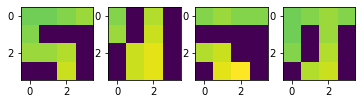

target:  0.8153726971992261 predict:  0.8153726962445899 error:  9.546362589318846e-10
state:  2  state2:  3
reward:  0.0 action right
Q[state,action] after:  0.8153726970178452
*****************
target:  0.8153726971992261 predict:  0.8153488863631959 error:  2.381083603020251e-05
state:  3  state2:  3
reward:  0.0 action up
Q[state,action] after:  0.8153681731403803
*****************
target:  0.84934656 predict:  0.8493465595825272 error:  4.174727230576991e-10
state:  3  state2:  2
reward:  0.0 action left
Q[state,action] after:  0.8493465599206802
*****************
target:  0.84934656 predict:  0.8493465596399787 error:  3.600212350463039e-10
state:  6  state2:  2
reward:  0.0 action up
Q[state,action] after:  0.8493465599315959
*****************
target:  0.8153726976 predict:  0.8153726975124507 error:  8.754930114207582e-11
state:  2  state2:  1
reward:  0.0 action left
Q[state,action] after:  0.8153726975833656
*****************
target:  0.84934656 predict:  0.8493465599315959 e

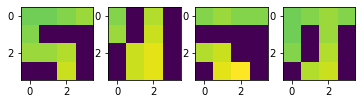

target:  0.815372697523853 predict:  0.8153726970178452 error:  5.060077912233396e-10
state:  2  state2:  3
reward:  0.0 action right
Q[state,action] after:  0.8153726974277116
*****************
hole:  7 0.0
done thru:  470
hole:  5 0.0
target:  0.8153726976 predict:  0.8153726975968394 error:  3.1605829065028956e-12
state:  2  state2:  1
reward:  0.0 action left
Q[state,action] after:  0.8153726975993995
*****************
hole:  11 0.0
hole:  5 0.0
target:  0.8153726976 predict:  0.8153726975993995 error:  6.005196340197472e-13
state:  2  state2:  1
reward:  0.0 action left
Q[state,action] after:  0.8153726975998858
*****************
target:  0.8153726976 predict:  0.8153726975998858 error:  1.141309269314661e-13
state:  2  state2:  1
reward:  0.0 action left
Q[state,action] after:  0.8153726975999783
*****************
target:  0.815372697523853 predict:  0.8153726974277116 error:  9.614142815195237e-11
state:  2  state2:  3
reward:  0.0 action right
Q[state,action] after:  0.81537269

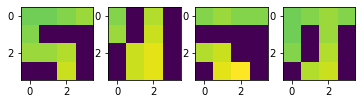

hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  12 0.0
hole:  5 0.0
target:  0.9215999999999965 predict:  0.9215999999997001 error:  2.964295475749168e-13
state:  9  state2:  13
reward:  0.0 action down
Q[state,action] after:  0.9215999999999402
*****************
target:  0.884736 predict:  0.8847359810213529 error:  1.89786470983222e-08
state:  13  state2:  9
reward:  0.0 action up
Q[state,action] after:  0.884735996394057
*****************
hole:  5 0.0
hole:  5 0.0
target:  0.84934656 predict:  0.8493465599870031 error:  1.2996825837774395e-11
state:  6  state2:  2
reward:  0.0 action up
Q[state,action] after:  0.8493465599975306
*****************
hole:  5 0.0
done thru:  490
target:  0.9215999999999965 predict:  0.9215999999999402 error:  5.6288307348495437e-14
state:  9  state2:  13
reward:  0.0 action down
Q[state,action] after:  0.9215999999999859
*****************
target:  0.9215999999999965 predict:  0.9215999977864447 error:  2.2135517863119958e-09
state:  13  state2:  13
reward

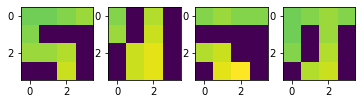

hole:  5 0.0
target:  0.9215999999999993 predict:  0.9215999999999859 error:  1.3433698597964394e-14
state:  9  state2:  13
reward:  0.0 action down
Q[state,action] after:  0.9215999999999968
*****************
target:  0.96 predict:  0.9599999999999993 error:  6.661338147750939e-16
state:  13  state2:  14
reward:  0.0 action right
Q[state,action] after:  0.9599999999999999
*****************
hole:  7 0.0
done thru:  500
hole:  5 0.0
hole:  5 0.0
hole:  11 0.0
hole:  5 0.0
hole:  5 0.0
goal:  15 1.0
show q
left
down
right
up


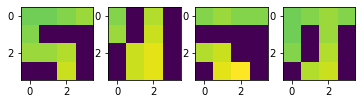

target:  0.9215999999999999 predict:  0.9215999999999968 error:  3.1086244689504383e-15
state:  9  state2:  13
reward:  0.0 action down
Q[state,action] after:  0.9215999999999993
*****************
target:  0.96 predict:  0.9599999999999999 error:  1.1102230246251565e-16
state:  13  state2:  14
reward:  0.0 action right
Q[state,action] after:  0.96
*****************
goal:  15 1.0
show q
left
down
right
up


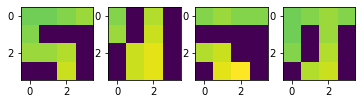

hole:  12 0.0
hole:  12 0.0
hole:  5 0.0
done thru:  510
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  7 0.0
goal:  15 1.0
show q
left
down
right
up


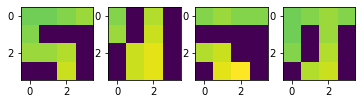

hole:  12 0.0
hole:  11 0.0
hole:  12 0.0
target:  0.9216 predict:  0.9215999999999993 error:  6.661338147750939e-16
state:  9  state2:  13
reward:  0.0 action down
Q[state,action] after:  0.9215999999999999
*****************
target:  0.9216 predict:  0.9215999995794217 error:  4.205782389021806e-10
state:  13  state2:  13
reward:  0.0 action down
Q[state,action] after:  0.9215999999200901
*****************
target:  0.884736 predict:  0.884735996394057 error:  3.6059429886492467e-09
state:  13  state2:  9
reward:  0.0 action up
Q[state,action] after:  0.8847359993148708
*****************
hole:  11 0.0
done thru:  520
hole:  5 0.0
hole:  12 0.0
hole:  7 0.0
hole:  7 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
target:  0.9216 predict:  0.9215999999999999 error:  1.1102230246251565e-16
state:  9  state2:  13
reward:  0.0 action down
Q[state,action] after:  0.9216
*****************
goal:  15 1.0
show q
left
down
right
up


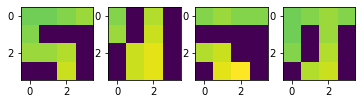

target:  0.8153726976 predict:  0.8153726975999783 error:  2.1649348980190553e-14
state:  2  state2:  1
reward:  0.0 action left
Q[state,action] after:  0.8153726975999959
*****************
hole:  5 0.0
done thru:  530
hole:  5 0.0
target:  0.84934656 predict:  0.8493465599975306 error:  2.469358051371273e-12
state:  6  state2:  2
reward:  0.0 action up
Q[state,action] after:  0.8493465599995308
*****************
target:  0.8153726975999007 predict:  0.8153726975995554 error:  3.452793606584237e-13
state:  2  state2:  3
reward:  0.0 action right
Q[state,action] after:  0.8153726975998351
*****************
target:  0.8153726975999007 predict:  0.8153725342665044 error:  1.6333339636354083e-07
state:  3  state2:  3
reward:  0.0 action up
Q[state,action] after:  0.8153726665665554
*****************
target:  0.84934656 predict:  0.8493465599998966 error:  1.0336176359260207e-13
state:  3  state2:  2
reward:  0.0 action left
Q[state,action] after:  0.8493465599999803
*****************
hole:

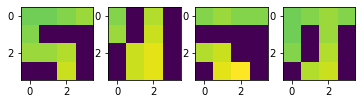

goal:  15 1.0
show q
left
down
right
up


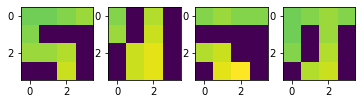

hole:  5 0.0
hole:  7 0.0
target:  0.8153726975999811 predict:  0.8153726975998351 error:  1.4599432773820809e-13
state:  2  state2:  3
reward:  0.0 action right
Q[state,action] after:  0.8153726975999533
*****************
target:  0.8153726975999811 predict:  0.8153726665665554 error:  3.103342571808554e-08
state:  3  state2:  3
reward:  0.0 action up
Q[state,action] after:  0.8153726917036302
*****************
hole:  7 0.0
hole:  12 0.0
hole:  12 0.0
target:  0.8153726975999811 predict:  0.8153726975999533 error:  2.7755575615628914e-14
state:  2  state2:  3
reward:  0.0 action right
Q[state,action] after:  0.8153726975999758
*****************
target:  0.84934656 predict:  0.8493465599999803 error:  1.965094753586527e-14
state:  3  state2:  2
reward:  0.0 action left
Q[state,action] after:  0.8493465599999962
*****************
hole:  5 0.0
target:  0.8153726976 predict:  0.8153726975999999 error:  1.1102230246251565e-16
state:  2  state2:  1
reward:  0.0 action left
Q[state,action] a

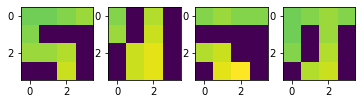

hole:  5 0.0
goal:  15 1.0
show q
left
down
right
up


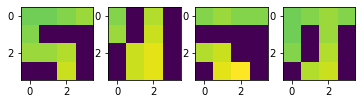

hole:  5 0.0
hole:  5 0.0
done thru:  570
hole:  12 0.0
hole:  12 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
goal:  15 1.0
show q
left
down
right
up


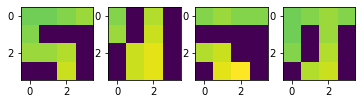

hole:  5 0.0
hole:  5 0.0
hole:  12 0.0
target:  0.884736 predict:  0.8847359998698254 error:  1.301745378157193e-10
state:  13  state2:  9
reward:  0.0 action up
Q[state,action] after:  0.8847359999752668
*****************
target:  0.9216 predict:  0.9215999999848171 error:  1.5182854973261328e-11
state:  13  state2:  13
reward:  0.0 action down
Q[state,action] after:  0.9215999999971153
*****************
target:  0.9216 predict:  0.9215999999971153 error:  2.8846924848835442e-12
state:  13  state2:  13
reward:  0.0 action down
Q[state,action] after:  0.9215999999994519
*****************
target:  0.9216 predict:  0.9215999999994519 error:  5.481171072574398e-13
state:  13  state2:  13
reward:  0.0 action down
Q[state,action] after:  0.9215999999998958
*****************
goal:  15 1.0
show q
left
down
right
up


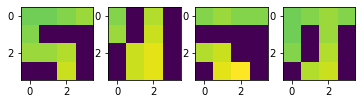

done thru:  580
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
target:  0.9216 predict:  0.921599932752305 error:  6.72476949681311e-08
state:  14  state2:  13
reward:  0.0 action left
Q[state,action] after:  0.9215999872229379
*****************
hole:  12 0.0
hole:  5 0.0
target:  0.9216 predict:  0.9215999999998958 error:  1.0413891970983968e-13
state:  13  state2:  13
reward:  0.0 action down
Q[state,action] after:  0.9215999999999802
*****************
target:  0.9216 predict:  0.9215999999999802 error:  1.9761969838327786e-14
state:  13  state2:  13
reward:  0.0 action down
Q[state,action] after:  0.9215999999999962
*****************
target:  0.884736 predict:  0.8847359999752668 error:  2.473321547569185e-11
state:  13  state2:  9
reward:  0.0 action up
Q[state,action] after:  0.8847359999953006
*****************
target:  0.9216 predict:  0.9215999999999962 error:  3.774758283725532e-15
state:  13  state2:  13
reward:  0.0 action down
Q[s

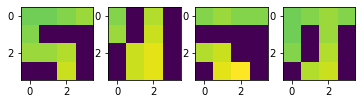

target:  0.884736 predict:  0.8847359999991071 error:  8.928413564035509e-13
state:  13  state2:  9
reward:  0.0 action up
Q[state,action] after:  0.8847359999998303
*****************
goal:  15 1.0
show q
left
down
right
up


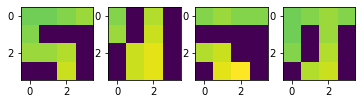

hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
target:  0.8153726975999993 predict:  0.815372697599998 error:  1.3322676295501878e-15
state:  2  state2:  3
reward:  0.0 action right
Q[state,action] after:  0.8153726975999991
*****************
hole:  7 0.0
goal:  15 1.0
show q
left
down
right
up


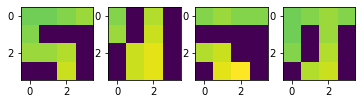

hole:  5 0.0
target:  0.84934656 predict:  0.8493465599999968 error:  3.219646771412954e-15
state:  6  state2:  2
reward:  0.0 action up
Q[state,action] after:  0.8493465599999993
*****************
hole:  11 0.0
done thru:  610
hole:  5 0.0
hole:  12 0.0
goal:  15 1.0
show q
left
down
right
up


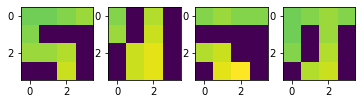

hole:  12 0.0
hole:  5 0.0
target:  0.8153726975999993 predict:  0.8153726975999991 error:  2.220446049250313e-16
state:  2  state2:  3
reward:  0.0 action right
Q[state,action] after:  0.8153726975999993
*****************
target:  0.8153726975999993 predict:  0.8153726917036302 error:  5.8963690596769425e-09
state:  3  state2:  3
reward:  0.0 action up
Q[state,action] after:  0.8153726964796892
*****************
target:  0.84934656 predict:  0.8493465599999993 error:  6.661338147750939e-16
state:  3  state2:  2
reward:  0.0 action left
Q[state,action] after:  0.8493465599999999
*****************
hole:  7 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
done thru:  620
hole:  7 0.0
target:  0.8153726975999999 predict:  0.8153726975999993 error:  5.551115123125783e-16
state:  2  state2:  3
reward:  0.0 action right
Q[state,action] after:  0.8153726975999998
*****************
hole:  7 0.0
hole:  5 0.0
hole:  5 0.0
hole:  7 0.0
hole:  5 0.0
hole:  11 0.0
target:  0.8153726975999999

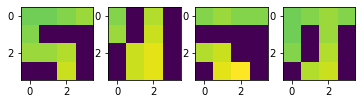

goal:  15 1.0
show q
left
down
right
up


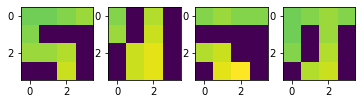

hole:  5 0.0
hole:  5 0.0
done thru:  640
hole:  5 0.0
hole:  7 0.0
hole:  12 0.0
goal:  15 1.0
show q
left
down
right
up


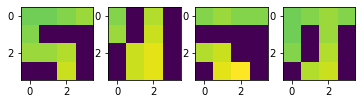

hole:  5 0.0
target:  0.8153726975999999 predict:  0.8153718429996388 error:  8.54600361033242e-07
state:  3  state2:  3
reward:  0.0 action right
Q[state,action] after:  0.8153725352259312
*****************
target:  0.84934656 predict:  0.8493465599999999 error:  1.1102230246251565e-16
state:  3  state2:  2
reward:  0.0 action left
Q[state,action] after:  0.84934656
*****************
target:  0.84934656 predict:  0.8493465599999993 error:  6.661338147750939e-16
state:  6  state2:  2
reward:  0.0 action up
Q[state,action] after:  0.8493465599999999
*****************
goal:  15 1.0
show q
left
down
right
up


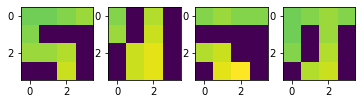

hole:  5 0.0
target:  0.8153726976 predict:  0.8153726975999999 error:  1.1102230246251565e-16
state:  2  state2:  3
reward:  0.0 action right
Q[state,action] after:  0.8153726976
*****************
hole:  11 0.0
goal:  15 1.0
show q
left
down
right
up


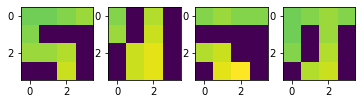

hole:  12 0.0
done thru:  650
hole:  7 0.0
hole:  7 0.0
hole:  5 0.0
hole:  5 0.0
hole:  12 0.0
goal:  15 1.0
show q
left
down
right
up


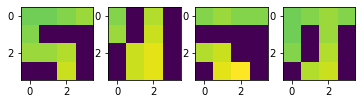

hole:  5 0.0
hole:  11 0.0
target:  0.9216 predict:  0.9215999999999999 error:  1.1102230246251565e-16
state:  13  state2:  13
reward:  0.0 action down
Q[state,action] after:  0.9216
*****************
target:  0.884736 predict:  0.8847359999998303 error:  1.6964207816272392e-13
state:  13  state2:  9
reward:  0.0 action up
Q[state,action] after:  0.8847359999999678
*****************
hole:  5 0.0
hole:  12 0.0
done thru:  660
hole:  12 0.0
hole:  5 0.0
hole:  11 0.0
target:  0.8153726976 predict:  0.8153725352259312 error:  1.623740687461961e-07
state:  3  state2:  3
reward:  0.0 action right
Q[state,action] after:  0.8153726667489269
*****************
hole:  11 0.0
target:  0.84934656 predict:  0.8493465599999999 error:  1.1102230246251565e-16
state:  6  state2:  2
reward:  0.0 action up
Q[state,action] after:  0.84934656
*****************
hole:  5 0.0
hole:  5 0.0
hole:  7 0.0
hole:  12 0.0
hole:  7 0.0
hole:  12 0.0
done thru:  670
hole:  5 0.0
hole:  12 0.0
hole:  12 0.0
hole:  5 0.

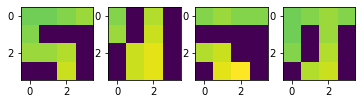

hole:  7 0.0
hole:  5 0.0
hole:  5 0.0
hole:  11 0.0
done thru:  680
goal:  15 1.0
show q
left
down
right
up


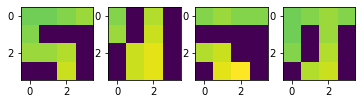

hole:  5 0.0
hole:  5 0.0
goal:  15 1.0
show q
left
down
right
up


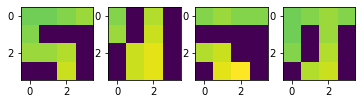

hole:  5 0.0
hole:  5 0.0
hole:  7 0.0
hole:  5 0.0
hole:  5 0.0
hole:  12 0.0
done thru:  690
hole:  11 0.0
target:  0.9216 predict:  0.9215999975723582 error:  2.4276417542878903e-09
state:  14  state2:  13
reward:  0.0 action left
Q[state,action] after:  0.921599999538748
*****************
hole:  11 0.0
hole:  5 0.0
hole:  5 0.0
goal:  15 1.0
show q
left
down
right
up


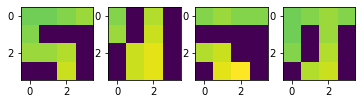

goal:  15 1.0
show q
left
down
right
up


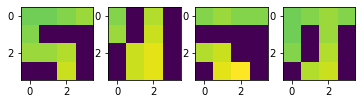

hole:  5 0.0
hole:  12 0.0
hole:  5 0.0
hole:  5 0.0
done thru:  700
hole:  5 0.0
hole:  5 0.0
hole:  12 0.0
hole:  12 0.0
target:  0.9216 predict:  0.921599999538748 error:  4.61251925543138e-10
state:  14  state2:  13
reward:  0.0 action left
Q[state,action] after:  0.9215999999123621
*****************
goal:  15 1.0
show q
left
down
right
up


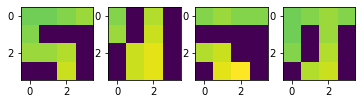

hole:  5 0.0
hole:  5 0.0
goal:  15 1.0
show q
left
down
right
up


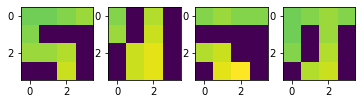

hole:  5 0.0
target:  0.9216 predict:  0.9215999999123621 error:  8.763789693944091e-11
state:  14  state2:  13
reward:  0.0 action left
Q[state,action] after:  0.9215999999833487
*****************
target:  0.9216 predict:  0.9215999999833487 error:  1.665123594563056e-11
state:  14  state2:  13
reward:  0.0 action left
Q[state,action] after:  0.9215999999968363
*****************
goal:  15 1.0
show q
left
down
right
up


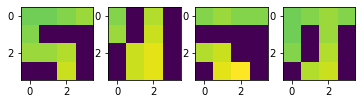

done thru:  710
hole:  7 0.0
target:  0.884736 predict:  0.8847359999999678 error:  3.219646771412954e-14
state:  13  state2:  9
reward:  0.0 action up
Q[state,action] after:  0.8847359999999939
*****************
hole:  5 0.0
hole:  5 0.0
goal:  15 1.0
show q
left
down
right
up


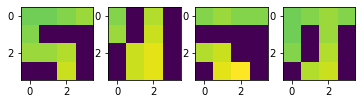

target:  0.8153726976 predict:  0.8153726667489269 error:  3.085107302958079e-08
state:  3  state2:  3
reward:  0.0 action right
Q[state,action] after:  0.8153726917382961
*****************
target:  0.8153726976 predict:  0.8153726973871408 error:  2.1285917473079508e-10
state:  3  state2:  3
reward:  0.0 action up
Q[state,action] after:  0.8153726975595568
*****************
hole:  7 0.0
hole:  12 0.0
hole:  5 0.0
hole:  5 0.0
target:  0.884736 predict:  0.8847359999999939 error:  6.106226635438361e-15
state:  13  state2:  9
reward:  0.0 action up
Q[state,action] after:  0.8847359999999989
*****************
target:  0.884736 predict:  0.8847359999999989 error:  1.1102230246251565e-15
state:  13  state2:  9
reward:  0.0 action up
Q[state,action] after:  0.8847359999999997
*****************
hole:  5 0.0
goal:  15 1.0
show q
left
down
right
up


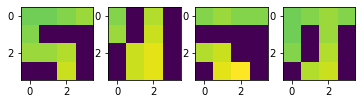

done thru:  720
hole:  5 0.0
hole:  12 0.0
hole:  12 0.0
goal:  15 1.0
show q
left
down
right
up


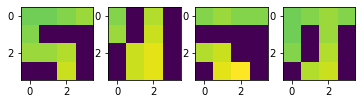

hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  12 0.0
target:  0.884736 predict:  0.8847359999999997 error:  2.220446049250313e-16
state:  13  state2:  9
reward:  0.0 action up
Q[state,action] after:  0.884736
*****************
hole:  5 0.0
goal:  15 1.0
show q
left
down
right
up


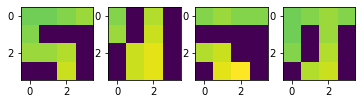

done thru:  730
goal:  15 1.0
show q
left
down
right
up


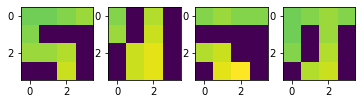

hole:  7 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
target:  0.8153726976 predict:  0.8153726917382961 error:  5.8617039000452564e-09
state:  3  state2:  3
reward:  0.0 action right
Q[state,action] after:  0.8153726964862762
*****************
hole:  5 0.0
hole:  12 0.0
done thru:  740
hole:  5 0.0
hole:  5 0.0
goal:  15 1.0
show q
left
down
right
up


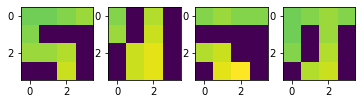

hole:  7 0.0
hole:  12 0.0
goal:  15 1.0
show q
left
down
right
up


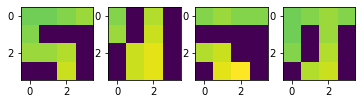

goal:  15 1.0
show q
left
down
right
up


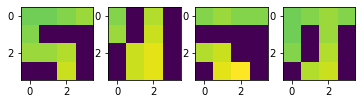

hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
done thru:  750
goal:  15 1.0
show q
left
down
right
up


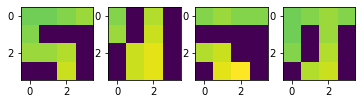

hole:  12 0.0
hole:  12 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  12 0.0
hole:  7 0.0
target:  0.9216 predict:  0.9215999999968363 error:  3.163691530971846e-12
state:  14  state2:  13
reward:  0.0 action left
Q[state,action] after:  0.9215999999993989
*****************
goal:  15 1.0
show q
left
down
right
up


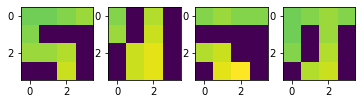

hole:  5 0.0
done thru:  760
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  12 0.0
target:  0.9216 predict:  0.9215999999993989 error:  6.010747455320598e-13
state:  14  state2:  13
reward:  0.0 action left
Q[state,action] after:  0.9215999999998857
*****************
target:  0.9216 predict:  0.9215999999998857 error:  1.142419492339286e-13
state:  14  state2:  13
reward:  0.0 action left
Q[state,action] after:  0.9215999999999782
*****************
hole:  12 0.0
goal:  15 1.0
show q
left
down
right
up


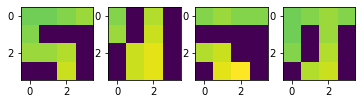

hole:  12 0.0
goal:  15 1.0
show q
left
down
right
up


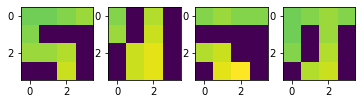

hole:  5 0.0
done thru:  770
hole:  5 0.0
hole:  5 0.0
target:  0.9216 predict:  0.9215999999999782 error:  2.1760371282653068e-14
state:  14  state2:  13
reward:  0.0 action left
Q[state,action] after:  0.9215999999999959
*****************
goal:  15 1.0
show q
left
down
right
up


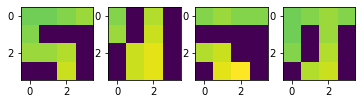

hole:  12 0.0
hole:  12 0.0
hole:  12 0.0
goal:  15 1.0
show q
left
down
right
up


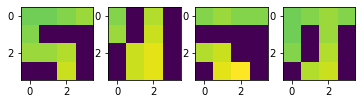

hole:  7 0.0
hole:  12 0.0
target:  0.9216 predict:  0.9215999999999959 error:  4.107825191113079e-15
state:  14  state2:  13
reward:  0.0 action left
Q[state,action] after:  0.9215999999999992
*****************
target:  0.9216 predict:  0.9215999999999992 error:  7.771561172376096e-16
state:  14  state2:  13
reward:  0.0 action left
Q[state,action] after:  0.9215999999999999
*****************
hole:  12 0.0
done thru:  780
target:  0.9216 predict:  0.9215999999999999 error:  1.1102230246251565e-16
state:  14  state2:  13
reward:  0.0 action left
Q[state,action] after:  0.9216
*****************
hole:  12 0.0
hole:  12 0.0
hole:  12 0.0
hole:  7 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
goal:  15 1.0
show q
left
down
right
up


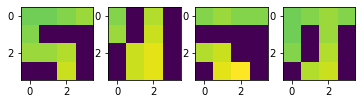

done thru:  790
hole:  5 0.0
hole:  12 0.0
target:  0.8153726976 predict:  0.8153726975595568 error:  4.04432043410452e-11
state:  3  state2:  3
reward:  0.0 action up
Q[state,action] after:  0.8153726975923158
*****************
hole:  5 0.0
hole:  5 0.0
hole:  11 0.0
hole:  12 0.0
hole:  12 0.0
hole:  11 0.0
goal:  15 1.0
show q
left
down
right
up


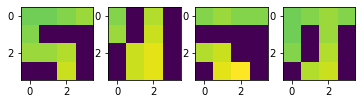

goal:  15 1.0
show q
left
down
right
up


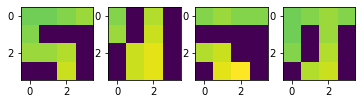

done thru:  800
hole:  11 0.0
goal:  15 1.0
show q
left
down
right
up


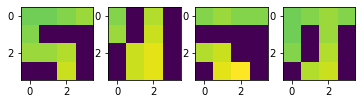

hole:  12 0.0
hole:  12 0.0
hole:  12 0.0
goal:  15 1.0
show q
left
down
right
up


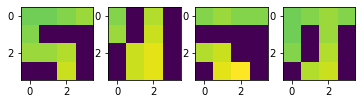

hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
done thru:  810
hole:  5 0.0
hole:  5 0.0
hole:  7 0.0
goal:  15 1.0
show q
left
down
right
up


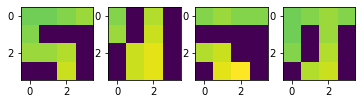

hole:  5 0.0
hole:  12 0.0
hole:  5 0.0
hole:  5 0.0
hole:  12 0.0
hole:  12 0.0
done thru:  820
goal:  15 1.0
show q
left
down
right
up


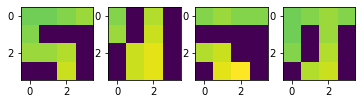

hole:  12 0.0
hole:  5 0.0
hole:  5 0.0
hole:  7 0.0
hole:  5 0.0
goal:  15 1.0
show q
left
down
right
up


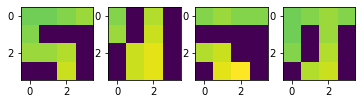

hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
done thru:  830
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  12 0.0
hole:  12 0.0
hole:  5 0.0
done thru:  840
hole:  5 0.0
goal:  15 1.0
show q
left
down
right
up


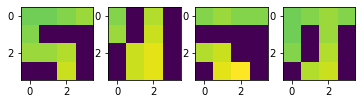

hole:  5 0.0
goal:  15 1.0
show q
left
down
right
up


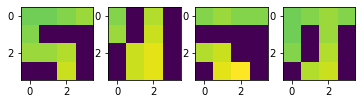

hole:  12 0.0
goal:  15 1.0
show q
left
down
right
up


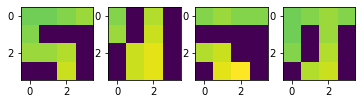

hole:  12 0.0
hole:  5 0.0
hole:  7 0.0
goal:  15 1.0
show q
left
down
right
up


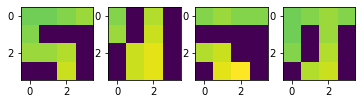

done thru:  850
goal:  15 1.0
show q
left
down
right
up


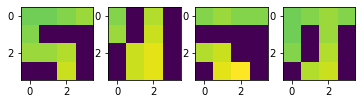

hole:  5 0.0
hole:  5 0.0
goal:  15 1.0
show q
left
down
right
up


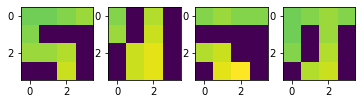

hole:  12 0.0
hole:  12 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  12 0.0
done thru:  860
hole:  5 0.0
goal:  15 1.0
show q
left
down
right
up


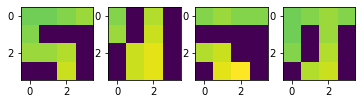

hole:  12 0.0
target:  0.8153726976 predict:  0.8153726964862762 error:  1.1137237798664046e-09
state:  3  state2:  3
reward:  0.0 action right
Q[state,action] after:  0.8153726973883925
*****************
hole:  5 0.0
hole:  5 0.0
hole:  11 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
done thru:  870
goal:  15 1.0
show q
left
down
right
up


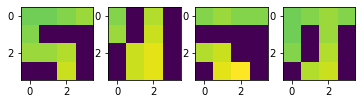

hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  12 0.0
hole:  5 0.0
goal:  15 1.0
show q
left
down
right
up


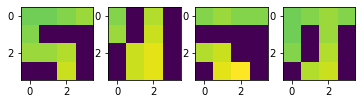

hole:  5 0.0
hole:  12 0.0
hole:  12 0.0
done thru:  880
hole:  5 0.0
goal:  15 1.0
show q
left
down
right
up


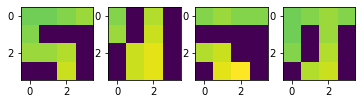

hole:  12 0.0
target:  0.8153726976 predict:  0.8153726975923158 error:  7.684186620338096e-12
state:  3  state2:  3
reward:  0.0 action up
Q[state,action] after:  0.81537269759854
*****************
hole:  7 0.0
goal:  15 1.0
show q
left
down
right
up


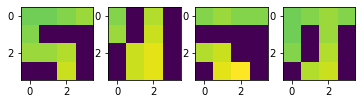

hole:  5 0.0
hole:  5 0.0
hole:  11 0.0
hole:  5 0.0
hole:  5 0.0
done thru:  890
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  11 0.0
hole:  12 0.0
hole:  12 0.0
hole:  5 0.0
goal:  15 1.0
show q
left
down
right
up


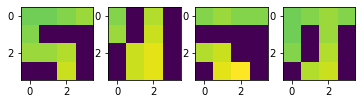

hole:  5 0.0
done thru:  900
target:  0.8153726976 predict:  0.8153726973883925 error:  2.1160750929283267e-10
state:  3  state2:  3
reward:  0.0 action right
Q[state,action] after:  0.8153726975597946
*****************
hole:  5 0.0
goal:  15 1.0
show q
left
down
right
up


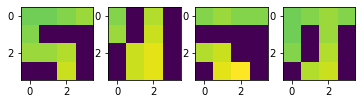

hole:  5 0.0
goal:  15 1.0
show q
left
down
right
up


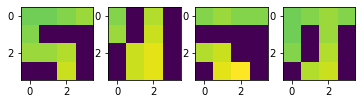

hole:  5 0.0
hole:  5 0.0
hole:  12 0.0
hole:  5 0.0
hole:  5 0.0
target:  0.8153726976 predict:  0.8153726975597946 error:  4.0205394569170494e-11
state:  3  state2:  3
reward:  0.0 action right
Q[state,action] after:  0.815372697592361
*****************
hole:  7 0.0
done thru:  910
hole:  12 0.0
hole:  12 0.0
hole:  7 0.0
target:  0.8153726976 predict:  0.815372697592361 error:  7.639000543235852e-12
state:  3  state2:  3
reward:  0.0 action right
Q[state,action] after:  0.8153726975985486
*****************
target:  0.8153726976 predict:  0.8153726975985486 error:  1.4513945600924671e-12
state:  3  state2:  3
reward:  0.0 action right
Q[state,action] after:  0.8153726975997242
*****************
hole:  7 0.0
hole:  12 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  12 0.0
done thru:  920
hole:  5 0.0
hole:  7 0.0
goal:  15 1.0
show q
left
down
right
up


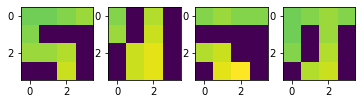

hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  12 0.0
goal:  15 1.0
show q
left
down
right
up


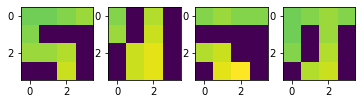

hole:  12 0.0
done thru:  930
hole:  5 0.0
hole:  5 0.0
hole:  12 0.0
hole:  12 0.0
hole:  12 0.0
hole:  5 0.0
goal:  15 1.0
show q
left
down
right
up


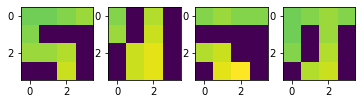

hole:  5 0.0
hole:  5 0.0
hole:  7 0.0
done thru:  940
hole:  12 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
target:  0.8153726976 predict:  0.8153726975997242 error:  2.757793993168889e-13
state:  3  state2:  3
reward:  0.0 action right
Q[state,action] after:  0.8153726975999476
*****************
hole:  7 0.0
goal:  15 1.0
show q
left
down
right
up


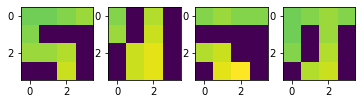

goal:  15 1.0
show q
left
down
right
up


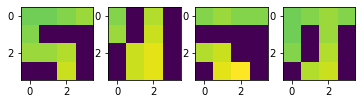

hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
done thru:  950
goal:  15 1.0
show q
left
down
right
up


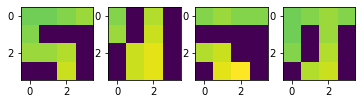

hole:  12 0.0
hole:  12 0.0
hole:  5 0.0
hole:  12 0.0
hole:  5 0.0
hole:  5 0.0
goal:  15 1.0
show q
left
down
right
up


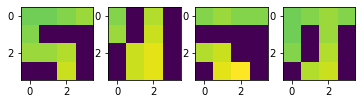

hole:  5 0.0
hole:  12 0.0
done thru:  960
hole:  12 0.0
hole:  5 0.0
hole:  5 0.0
hole:  7 0.0
hole:  12 0.0
hole:  5 0.0
hole:  11 0.0
goal:  15 1.0
show q
left
down
right
up


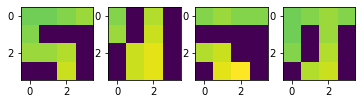

hole:  5 0.0
hole:  5 0.0
done thru:  970
hole:  12 0.0
hole:  5 0.0
hole:  12 0.0
hole:  5 0.0
hole:  5 0.0
hole:  11 0.0
hole:  12 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
done thru:  980
target:  0.8153726976 predict:  0.81537269759854 error:  1.4599432773820809e-12
state:  3  state2:  3
reward:  0.0 action up
Q[state,action] after:  0.8153726975997226
*****************
target:  0.8153726976 predict:  0.8153726975999476 error:  5.240252676230739e-14
state:  3  state2:  3
reward:  0.0 action right
Q[state,action] after:  0.81537269759999
*****************
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  12 0.0
hole:  5 0.0
done thru:  990
hole:  5 0.0
hole:  12 0.0
hole:  11 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  5 0.0
hole:  12 0.0
hole:  12 0.0
[[0.78275779 0.8153727  0.8153727  0.78275779]
 [0.78275779 0.         0.84934656 0.8153727 ]
 [0.8153727  0.884736   0.8153727  0.84934656]
 [0.84934656

In [2]:
epsilon = 0.75
total_episodes = 1000
max_steps = 100  ##upper vound on steps in the episode

learning_rate = 0.81

##gamma is the discount rate for future values
gamma = 0.96

#preallocate the Q matrix.  Note in contrast to the multiarm bandits, Q is Q(state,action) not Q(action)
Q = np.zeros((env.observation_space.n, env.action_space.n))

action_names = ['left', 'down', 'right', 'up']

#note this is just like the action in run_bandit below but with 4 choices
def choose_action(state):
    '''
    Input:  current state
    Output: action greedy or random depending on epsilon'''
    action=0
    if np.random.uniform(0, 1) < epsilon:
        #print("random")
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state, :])
        #print("greedy")
    return action

#state 2 is the choice of next state.  

def learn(state, state2, reward, action):
    #predict is the value of taking the assigned action in the assigned state
    predict = Q[state, action] 
    
    #target is the discounted max of all actions from the assigned new state
    target = reward + (gamma * np.max(Q[state2, :]))
    error = target - predict
    
    #Q[state, action] = Q[state, action] + learning_rate * (target - predict)
    #substitute predict for Q[state, action] in the commented line above
    Q[state, action] = predict + (learning_rate * (target - predict))
    if error != 0:
        print("target: ", target, "predict: ", predict, "error: ", error)
        print("state: ", state, " state2: ", state2)
        print("reward: ", reward, "action", action_names[action])
        print("Q[state,action] after: ", Q[state,action])
        print('*****************')
    
def show_q():
    print("show q")
    for i in range(4): 
        plt.subplot(1,4,i+1)
        
        plt.imshow(Q.reshape(4,4,4)[:,:,i], clim = [0, np.max(Q)])
 
        print(action_names[i])
    #plt.colorbar()
    plt.show()

# Start
for episode in range(total_episodes):
    state = env.reset()
    t = 0
    if episode%10 == 0:
        print('done thru: ', episode)
    while t < max_steps:
        #env.render()   

        action = choose_action(state)  
        #print(action_names[action])
        state2, reward, done, info = env.step(action) 
        ##5,7,11,12 are holes
        holes = [5,7,11,12]
        goals = [15]
        
        if state2 in holes:
            print("hole: ", state2, reward)
        if state2 in goals:
            print("goal: ", state2, reward)
            show_q()
          
        learn(state, state2, reward, action)
    
        state = state2

        t += 1
       
        if done:
            #done means you either died or found the reward
            #print(t, "breaking")
            break

        time.sleep(0.1)

print(Q)


with open("frozenLake_qTable.pkl", 'wb') as f:
    pickle.dump(Q, f)